<a href="https://colab.research.google.com/github/LIMJIALIH/WIA1007/blob/main/WIA1007_Group_Assignment_Chill_Property_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**

1. Chua Yu Jien (23118637)
2. Lim Jia Lih (24004471)
3. Brayden Chong Jie Rui (23096507)
4. Ong Yi Hao (24004516)
5. Ling Hua Rong (24004492)

# Special Thanks

We extend our sincere appreciation to all individuals who contributed to the success of this project. Your support and guidance were essential in shaping our work and helping us achieve our goals.

##***Dr. Muhammad Shahreeza Safiruz Bin Kassim***

We are especially grateful to Dr. Muhammad Shahreeza for his invaluable mentorship and expertise. His insightful feedback and unwavering encouragement were instrumental in our understanding of the subject matter and navigating project challenges. We deeply appreciate his dedication to creating a positive learning environment.

#1. Design Project

As a group, we come up with a question, **can we accurately predict property prices in Kuala Lumpur based on features like location, size, property type,furnishing and more?**

## **Theme**
###Property Listing in Kuala Lumpur

# 2. Data Collection
Once you have decided on a theme, you will need to collect/find data that is relevantto your project. You can use publicly available datasets or collect data on your own. Ensure that your data is relevant, reliable, and sufficient for your project.

## **Dataset**

https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Data Preprocessing
After collecting your data, you will need to preprocess it to make it
suitable for machine learning. This may include cleaning, normalization, feature extraction,
and transformation. You must have two tables in your report, as given by the examples
below


* Display the first 5 rows of the dataset to get an initial sense of the data.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kl_properties.csv')

df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


* From df.info(), the dataset has minimum 51787 samples, or row of observation of 8 columns. The number of samples is quite enough. All the columns in the dataset consists of 'float64' and 'object' datatype and there are some missing values in every column except Location.

### Data Cleaning

#### Clean Inconsistent Data


Cleaning the dataset that has all Kuala Lumpur words, and redundant datas.

In [ ]:
df['Location'] = df['Location'].str.replace('Kuala Lumpur', '').str.strip()
df['Location'] = df['Location'].str.replace(',', '').str.strip()
df['Location'] = df['Location'].str.replace('Klcc', 'KLCC')

df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,KLCC,"RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,"RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,"RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,Cheras,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bukit Jalil,"RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,Bangsar,"RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,"RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,"RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,"RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


Remove RM and the commas in price column

In [ ]:
#remove RM and the commas in price.

# Assuming your DataFrame is named 'df'
df['Price'] = df['Price'].astype(str)  # Convert to string if not already
df['Price'] = df['Price'].str.replace('RM', '', regex=False)  # Remove 'RM'
df['Price'] = df['Price'].str.replace(',', '', regex=False)  # Remove commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handling errors
df['Price'] = df['Price'].round(2)  # Round to 2 decimal places

Since car parks may be unrelated, we will remove them


In [ ]:
df = df.drop('Car Parks', axis=1)

#### Clean Noisy Data

There are areas that are obviously not in Kuala Lumpur, therefore we are trying to clean the noisy data

In [ ]:
df['Location'].unique()

array(['KLCC', 'Damansara Heights', 'Dutamas', 'Cheras', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Seputeh', 'Sri Petaling', 'Ampang Hilir',
       'Bukit Tunku (Kenny Hills)', 'Mont Kiara', 'Desa ParkCity',
       'Bangsar South', 'Sungai Besi',
       'Jalan Klang Lama (Old Klang Road)', 'Kepong', 'Jalan Kuching',
       'KL City', 'Taman Melawati', 'Sentul', 'KL Sentral', 'Setapak',
       'Bangsar', 'City Centre', 'Bukit Bintang', 'Jalan Sultan Ismail',
       'Kuchai Lama', 'Country Heights Damansara', 'Taman Desa',
       'Segambut', 'Batu Caves', 'Wangsa Maju', 'Ampang', 'Sri Hartamas',
       'Bukit Kiara', 'Setiawangsa', 'OUG', 'Chan Sow Lin',
       'Bandar Menjalara', 'KL Eco City', 'Sunway SPK', 'Pantai',
       'ADIVA Desa ParkCity', 'Jalan Ipoh', 'Mid Valley City',
       'Brickfields', 'Desa Pandan', 'Keramat', 'Pandan Indah',
       'Desa Petaling', 'Federal Hill', 'Other', 'Pandan Perdana',
       'Bandar Damai Perdana', 'Puchong', 'Salak Selatan', 'SEMARAK',
     

In [ ]:
kl_districts = ['KLCC', 'Damansara Heights', 'Dutamas', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Bukit Tunku (Kenny Hills)',
       'Mont Kiara', 'Desa ParkCity', 'Bangsar South', 'Sungai Besi',
       'Ampang Hilir', 'Kepong', 'Jalan Klang Lama (Old Klang Road)',
       'KL City', 'KL Sentral', 'Taman Melawati', 'Setapak',
       'City Centre', 'Country Heights Damansara', 'Taman Desa', 'Sentul',
       'Cheras', 'Bangsar', 'Segambut', 'Wangsa Maju', 'Ampang',
       'Sri Hartamas', 'Bukit Kiara', 'Setiawangsa', 'OUG', 'Bukit Bintang',
       'Jalan Sultan Ismail', 'Chan Sow Lin', 'Jalan Kuching',
       'Bandar Menjalara', 'Seputeh', 'KL Eco City', 'Kuchai Lama',
       'Jalan Ipoh', 'Mid Valley City', 'Brickfields', 'Desa Pandan',
       'Desa Petaling', 'Federal Hill', 'Semarak', 'Titiwangsa']

df = df[df['Location'].isin(kl_districts)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51787 entries, 0 to 53882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51787 non-null  object 
 1   Price          51549 non-null  float64
 2   Rooms          50216 non-null  object 
 3   Bathrooms      49910 non-null  float64
 4   Property Type  51762 non-null  object 
 5   Size           50771 non-null  object 
 6   Furnishing     45238 non-null  object 
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


There are samples that have more bathrooms than rooms, which is unrealistic and can be removed as noisy data

In [ ]:
#Remove all rows that has bathrooms more than rooms

#Also for rooms, please help me to add the values if they got + sign

import re
import numpy as np
import pandas as pd

# Function to sum room values with '+' sign
def sum_rooms(room_string):
    try:
        # Find all numbers using regex
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())


We would like to remove the outliers in the price column. Any house price below RM10000 will be removed immediately.

In [ ]:
# Remove rows where Price <= 10000
df = df[df['Price'] > 10000]

# Display the updated DataFrame (optional)
print(df.head())

              Location      Price  Rooms  Bathrooms         Property Type  \
0                 KLCC  1250000.0      3        3.0    Serviced Residence   
1    Damansara Heights  6800000.0      6        7.0              Bungalow   
2              Dutamas  1030000.0      3        4.0  Condominium (Corner)   
4          Bukit Jalil   900000.0      5        3.0  Condominium (Corner)   
5  Taman Tun Dr Ismail  5350000.0      6        5.0              Bungalow   

                       Size        Furnishing  
0  Built-up : 1,335 sq. ft.   Fully Furnished  
1  Land area : 6900 sq. ft.  Partly Furnished  
2  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Built-up : 1,513 sq. ft.  Partly Furnished  
5  Land area : 7200 sq. ft.  Partly Furnished  


#### Clean Incomplete Data

Dealing with Missing Values and Null Values

* Identify the total number of missing values using df.isna().sum()

In [ ]:
import numpy as np

df.isna().sum()

,0
Location,0
Price,0
Rooms,1503
Bathrooms,1806
Property Type,0
Size,944
Furnishing,6408


Change Bathroom into integer data type

In [ ]:
# Convert bathrooms to integer
df['Bathrooms'] = df['Bathrooms'].astype('Int64')  # Handles NaN values
df.head()

<ipython-input-13-651629090915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathrooms'] = df['Bathrooms'].astype('Int64')  # Handles NaN values


,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,KLCC,1250000.0,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,6,7,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,6,5,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


Change Rooms into integer data type as well, add the values together

For example:
2+1, we will make them = 3.

In [ ]:
import pandas as pd
import numpy as np
import re


def sum_rooms(room_string):
    """
    Extracts numbers from room_string and returns their sum.
    Handles formats like "2+1", "Studio", "4+2 Duplex", etc.
    Returns NaN if extraction fails.
    """

    try:
        # Try to find all numbers using regular expression
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())

df

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,KLCC,1250000.0,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,6,7,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,6,5,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,6,4,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,5000000.0,5,4,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,5500000.0,6,4,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,480000.0,3,2,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [ ]:
df = df.dropna(thresh=len(df.columns) - 2)

Handle missing values at Furnishing column, remove all the NaN values

In [ ]:
df['Furnishing'].unique()

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished', nan,
       'Unknown'], dtype=object)

In [ ]:
# Drop rows where 'Furnishing' is 'Unknown' or NaN
df = df[df['Furnishing'].notna() & (df['Furnishing'] != 'Unknown')]

In [ ]:
print(f"Number of rows with 'Fully Furnished': {df[df['Furnishing'] == 'Fully Furnished'].shape[0]}")
print(f"Number of rows with 'Partly Furnished': {df[df['Furnishing'] == 'Partly Furnished'].shape[0]}")
print(f"Number of rows with 'Unfurnished': {df[df['Furnishing'] == 'Unfurnished'].shape[0]}")

Number of rows with 'Fully Furnished': 13425
Number of rows with 'Partly Furnished': 25353
Number of rows with 'Unfurnished': 5409


In [ ]:
df.isna().sum()

,0
Location,0
Price,0
Rooms,436
Bathrooms,596
Property Type,0
Size,665
Furnishing,0


For rooms and bathrooms, since all houses are similar, therefore I try to use the median for the rooms and bathrooms in our dataset.

In [ ]:
import pandas as pd

# Calculate median, mode, and mean for Rooms and Bathrooms by Property Type
property_stats = df.groupby('Property Type').agg({
    'Rooms': [pd.Series.mode, 'median', 'mean'],  # Mode, median, mean of Rooms
    'Bathrooms': [pd.Series.mode, 'median', 'mean']  # Mode, median, mean of Bathrooms
})

# Flatten MultiIndex columns for easier access
property_stats.columns = ['_'.join(col).strip() for col in property_stats.columns.values]
property_stats = property_stats.rename(columns={
    'Rooms_mode': 'Rooms_Mode',
    'Rooms_median': 'Rooms_Median',
    'Rooms_mean': 'Rooms_Mean',
    'Bathrooms_mode': 'Bathrooms_Mode',
    'Bathrooms_median': 'Bathrooms_Median',
    'Bathrooms_mean': 'Bathrooms_Mean'
})

# Display the results
print(property_stats)

# Example usage to fill NaN values in 'Rooms' based on property type
# Assuming you want to use the median:
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    # Check if median_rooms is NAType before converting to int
    if not pd.isna(median_rooms):
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)  # Fill with median, converted to int
    else:
        # Handle NAType (e.g., fill with a default value or drop rows)
        # Here, we fill with 0 as an example, you might need to adjust this
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = 0

# Repeat the above for 'Bathrooms' using the appropriate statistic (mode, median, or mean)

                                        Rooms_Mode  Rooms_Median  Rooms_Mean  \
Property Type                                                                  
1-sty Terrace/Link House                         3           3.0    3.243902   
1-sty Terrace/Link House (Corner)                3           4.0    3.930556   
1-sty Terrace/Link House (EndLot)                3           3.0    3.676471   
1-sty Terrace/Link House (Intermediate)          3           3.0    3.367925   
1.5-sty Terrace/Link House                       4           4.0    3.666667   
...                                            ...           ...         ...   
Townhouse                                        3           3.0         3.4   
Townhouse (Corner)                               3           4.0    3.717949   
Townhouse (Duplex)                               3           3.0       3.375   
Townhouse (EndLot)                               4           4.0        3.72   
Townhouse (Intermediate)                

In [ ]:
# Fill NaN values in 'Rooms' with median
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    # Check if median_rooms is NAType before converting to int
    if pd.notna(median_rooms):  # Check if median_rooms is not NA
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)  # Fill with median, converted to int
    else:
        # Handle NAType (e.g., fill with a default value or drop rows)
        # Here, we fill with a default value of 0, you might need to adjust this
        df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = 0  # Fill with a default value (0)

# Fill NaN values in 'Bathrooms' with median
for property_type in df['Property Type'].unique():
    median_bathrooms = property_stats.loc[property_type, 'Bathrooms_Median']
    # Check if median_bathrooms is NAType before converting to int
    if pd.notna(median_bathrooms):  # Check if median_bathrooms is not NA
        df.loc[(df['Property Type'] == property_type) & (df['Bathrooms'].isnull()), 'Bathrooms'] = int(median_bathrooms)  # Fill with median, converted to int
    else:
        # Handle NAType (e.g., fill with a default value or drop rows)
        # Here, we fill with a default value of 0, you might need to adjust this
        df.loc[(df['Property Type'] == property_type) & (df['Bathrooms'].isnull()), 'Bathrooms'] = 0  # Fill with a default value (0)

print(df.isna().sum()) #Check if all NaN values filled

Location           0
Price              0
Rooms              0
Bathrooms          0
Property Type      0
Size             665
Furnishing         0
dtype: int64


For size, since there are too many various values, therefore it is recommended to remove them instead of using mean, median or mode.

In [ ]:
df = df.dropna(subset=['Size'])

In [ ]:
df.isna().sum()

,0
Location,0
Price,0
Rooms,0
Bathrooms,0
Property Type,0
Size,0
Furnishing,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43522 entries, 0 to 53882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       43522 non-null  object 
 1   Price          43522 non-null  float64
 2   Rooms          43522 non-null  Int64  
 3   Bathrooms      43522 non-null  Int64  
 4   Property Type  43522 non-null  object 
 5   Size           43522 non-null  object 
 6   Furnishing     43522 non-null  object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 2.7+ MB


##Data Generalization

We allocate the locations into the KL districts.

In [ ]:
def categorize_location(location):
    if location in ['Kepong', 'Bandar Menjalara']:
        return 'Kepong'
    elif location in ['Jalan Kuching', 'Taman Melawati']:
        return 'Batu'
    elif location in ['Wangsa Maju', 'Setapak']:
        return 'Wangsa Maju'
    elif location in ['Setiawangsa', 'Ampang Hilir', 'Desa Pandan']:
        return 'Setiawangsa'
    elif location in ['Dutamas', 'Mont Kiara', 'Desa ParkCity', 'Segambut', 'Taman Tun Dr Ismail', 'Sentul', 'Sri Hartamas', 'Bukit Kiara']:
        return 'Segambut'
    elif location in ['Bukit Bintang', 'Jalan Sultan Ismail', 'KLCC', 'KL City', 'City Centre', 'Chan Sow Lin']:
        return 'Bukit Bintang'
    elif location in ['Titiwangsa', 'Jalan Ipoh', 'Federal Hill']:  # Assuming Chow Kit is represented by Jalan Ipoh
        return 'Titiwangsa'
    elif location in ['Bangsar', 'Bangsar South', 'Mid Valley City', 'Brickfields', 'KL Eco City', 'Seputeh', 'Damansara Heights','Bukit Tunku (Kenny Hills)', 'KL Sentral', 'Country Heights Damansara']:
        return 'Lembah Pantai'
    elif location in ['Seputeh', 'Kuchai Lama', 'Jalan Klang Lama (Old Klang Road)', 'Desa Petaling', 'Bukit Jalil', 'Sri Petaling', 'OUG']:
        return 'Seputeh'
    elif location in ['Cheras', 'Taman Desa', 'Ampang']:
        return 'Cheras'
    elif location in ['Sungai Besi']:
        return 'Bandar Tun Razak'
    else:
        return location  # Return the original location if not categorized

df['Location']= df['Location'].apply(categorize_location)

<ipython-input-25-1f56fb966bb9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location']= df['Location'].apply(categorize_location)


In [ ]:
df['Location'].unique()

array(['Bukit Bintang', 'Lembah Pantai', 'Segambut', 'Seputeh',
       'Setiawangsa', 'Kepong', 'Bandar Tun Razak', 'Batu', 'Wangsa Maju',
       'Cheras', 'Titiwangsa'], dtype=object)

* The locations are now categorized in 11 districts

Due to various property types, these property types will be splitted into 15 different categories.

In [ ]:
# Grouping property types into 15 broad categories
df['Property Type'] = df['Property Type'].replace({
    # Detached Houses (Bungalows and related types)
    'Bungalow': 'Detached House',
    'Bungalow (Corner)': 'Detached House',
    'Bungalow (Intermediate)': 'Detached House',
    'Bungalow (EndLot)': 'Detached House',
    'Bungalow (Triplex)': 'Detached House',
    'Bungalow (Duplex)': 'Detached House',
    'Bungalow (Penthouse)': 'Detached House',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # Semi-Detached Houses
    'Semi-detached House': 'Semi-detached House',
    'Semi-detached House (Intermediate)': 'Semi-detached House',
    'Semi-detached House (Corner)': 'Semi-detached House',
    'Semi-detached House (EndLot)': 'Semi-detached House',
    'Semi-detached House (Duplex)': 'Semi-detached House',
    'Semi-detached House (Triplex)': 'Semi-detached House',
    'Semi-detached House (SOHO)': 'Semi-detached House',

    # Condominiums and Serviced Residences
    'Condominium': 'Condominium/Serviced Residence',
    'Condominium (Corner)': 'Condominium/Serviced Residence',
    'Condominium (Intermediate)': 'Condominium/Serviced Residence',
    'Condominium (Duplex)': 'Condominium/Serviced Residence',
    'Condominium (Penthouse)': 'Condominium/Serviced Residence',
    'Condominium (Studio)': 'Condominium/Serviced Residence',
    'Condominium (EndLot)': 'Condominium/Serviced Residence',
    'Condominium (SOHO)': 'Condominium/Serviced Residence',
    'Condominium (Triplex)': 'Condominium/Serviced Residence',

    'Serviced Residence': 'Condominium/Serviced Residence',
    'Serviced Residence (Intermediate)': 'Condominium/Serviced Residence',
    'Serviced Residence (Corner)': 'Condominium/Serviced Residence',
    'Serviced Residence (Penthouse)': 'Condominium/Serviced Residence',
    'Serviced Residence (Duplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (SOHO)': 'Condominium/Serviced Residence',
    'Serviced Residence (Studio)': 'Condominium/Serviced Residence',
    'Serviced Residence (Triplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (EndLot)': 'Condominium/Serviced Residence',

    # Apartments
    'Apartment': 'Apartment',
    'Apartment (Corner)': 'Apartment',
    'Apartment (Intermediate)': 'Apartment',
    'Apartment (EndLot)': 'Apartment',
    'Apartment (Duplex)': 'Apartment',
    'Apartment (Studio)': 'Apartment',
    'Apartment (Penthouse)': 'Apartment',
    'Apartment (Triplex)': 'Apartment',

    # Townhouses
    'Townhouse': 'Townhouse',
    'Townhouse (Intermediate)': 'Townhouse',
    'Townhouse (EndLot)': 'Townhouse',
    'Townhouse (Corner)': 'Townhouse',
    'Townhouse (Duplex)': 'Townhouse',
    'Townhouse (Triplex)': 'Townhouse',

    # Cluster Houses
    'Cluster House': 'Cluster House',
    'Cluster House (Intermediate)': 'Cluster House',
    'Cluster House (Corner)': 'Cluster House',

    # Flats
    'Flat': 'Flat',
    'Flat (Intermediate)': 'Flat',
    'Flat (Corner)': 'Flat',
    'Flat (EndLot)': 'Flat',
    'Flat (Penthouse)': 'Flat',
    'Flat (Duplex)': 'Flat',

    # Land
    'Residential Land': 'Land',
    'Residential Land (Intermediate)': 'Land',
    'Residential Land (EndLot)': 'Land',
    'Residential Land (Corner)': 'Land',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # 1-story properties
    '1-sty Terrace/Link House': '1-Story Terrace',
    '1-sty Terrace/Link House (Intermediate)': '1-Story Terrace',
    '1-sty Terrace/Link House (EndLot)': '1-Story Terrace',
    '1-sty Terrace/Link House (Corner)': '1-Story Terrace',
    '1-sty Terrace/Link House (Penthouse)': '1-Story Terrace',

    # 1.5-Story Properties
    '1.5-sty Terrace/Link House': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Intermediate)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (EndLot)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Corner)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Duplex)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Penthouse)': '1.5-Story Terrace',

    # 2-story properties
    '2-sty Terrace/Link House': '2-Story Terrace',
    '2-sty Terrace/Link House (Intermediate)': '2-Story Terrace',
    '2-sty Terrace/Link House (EndLot)': '2-Story Terrace',
    '2-sty Terrace/Link House (Corner)': '2-Story Terrace',
    '2-sty Terrace/Link House (Duplex)': '2-Story Terrace',
    '2-sty Terrace/Link House (Penthouse)': '2-Story Terrace',
    '2-sty Terrace/Link House (Triplex)': '2-Story Terrace',

    # 2.5-Story Properties
    '2.5-sty Terrace/Link House': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Intermediate)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (EndLot)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Corner)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Triplex)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Penthouse)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Duplex)': '2.5-Story Terrace',

    # 3-story properties
    '3-sty Terrace/Link House': '3-Story Terrace',
    '3-sty Terrace/Link House (Intermediate)': '3-Story Terrace',
    '3-sty Terrace/Link House (EndLot)': '3-Story Terrace',
    '3-sty Terrace/Link House (Corner)': '3-Story Terrace',
    '3-sty Terrace/Link House (Duplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Triplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Penthouse)': '3-Story Terrace',

    # 3.5-Story Properties
    '3.5-sty Terrace/Link House': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Intermediate)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (EndLot)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Corner)': '3.5-Story Terrace',

    # 4-story properties
    '4-sty Terrace/Link House': '4-Story Terrace',
    '4-sty Terrace/Link House (Intermediate)': '4-Story Terrace',
    '4-sty Terrace/Link House (EndLot)': '4-Story Terrace',
    '4-sty Terrace/Link House (Corner)': '4-Story Terrace',
    '4-sty Terrace/Link House (Penthouse)': '4-Story Terrace',
    '4.5-sty Terrace/Link House (Intermediate)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House (Corner)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House': '4.5-Story Terrace'

})


In [ ]:
df['Property Type'].unique()

array(['Condominium/Serviced Residence', 'Detached House',
       'Semi-detached House', '2-Story Terrace', 'Apartment',
       '3-Story Terrace', '2.5-Story Terrace', '3.5-Story Terrace',
       '1.5-Story Terrace', '1-Story Terrace', '4-Story Terrace',
       'Townhouse', '4.5-Story Terrace', 'Land', 'Flat', 'Cluster House'],
      dtype=object)

For every single location, view the frequency of each property type.

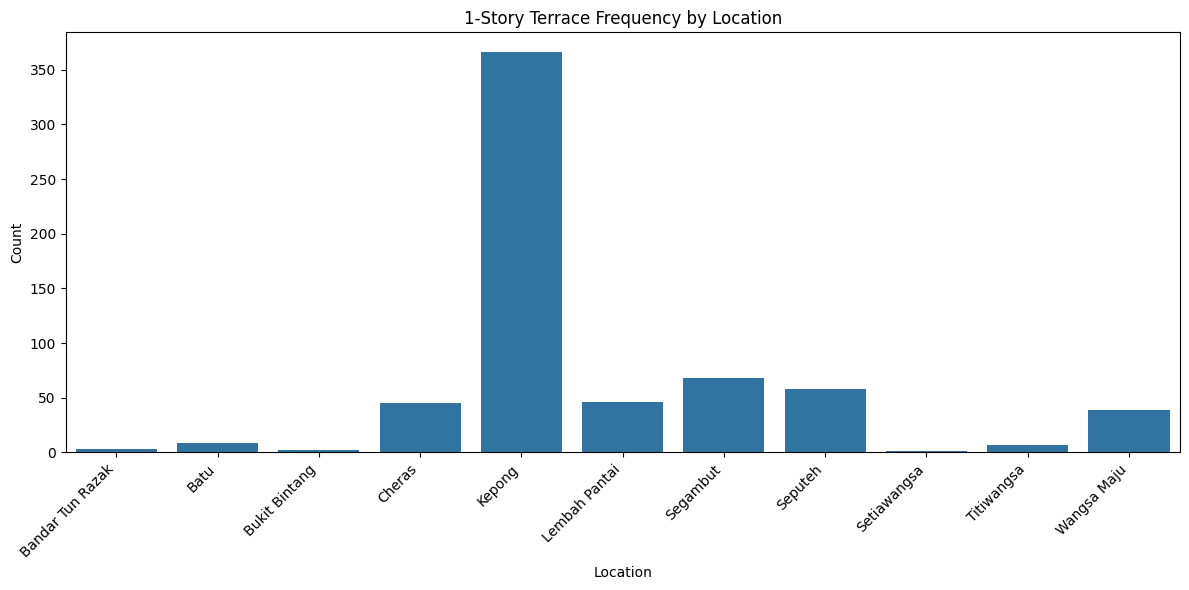

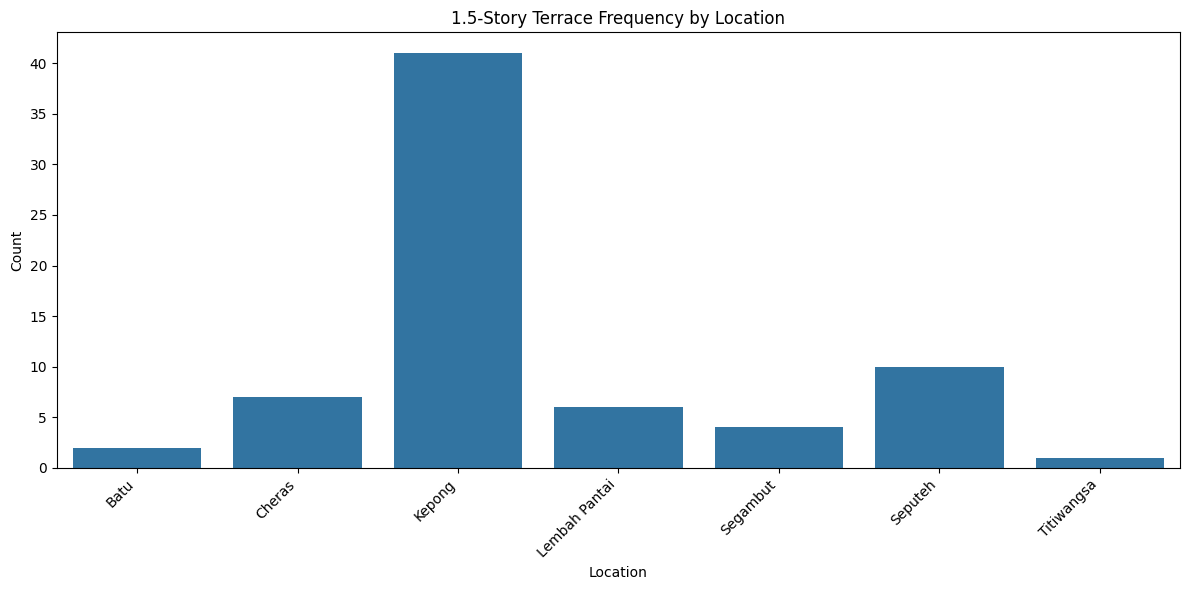

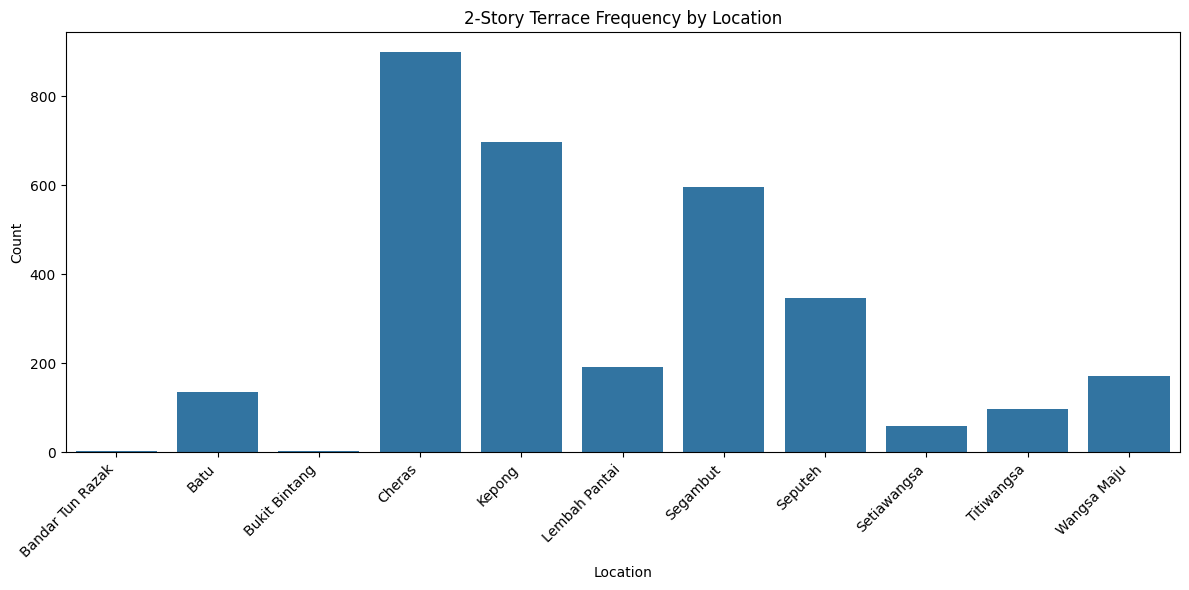

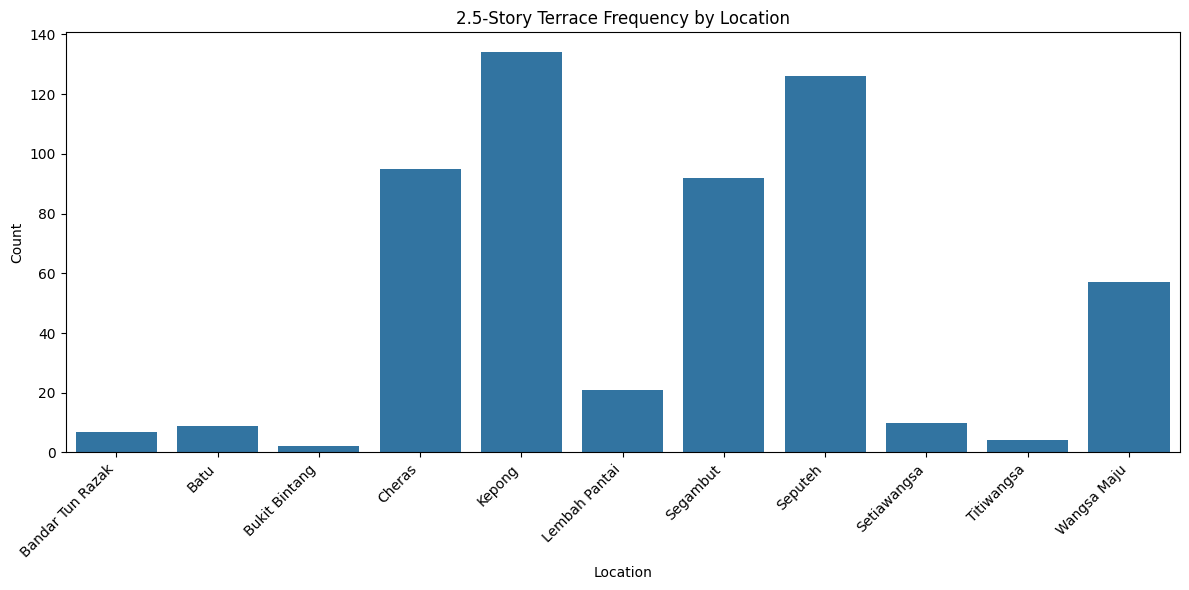

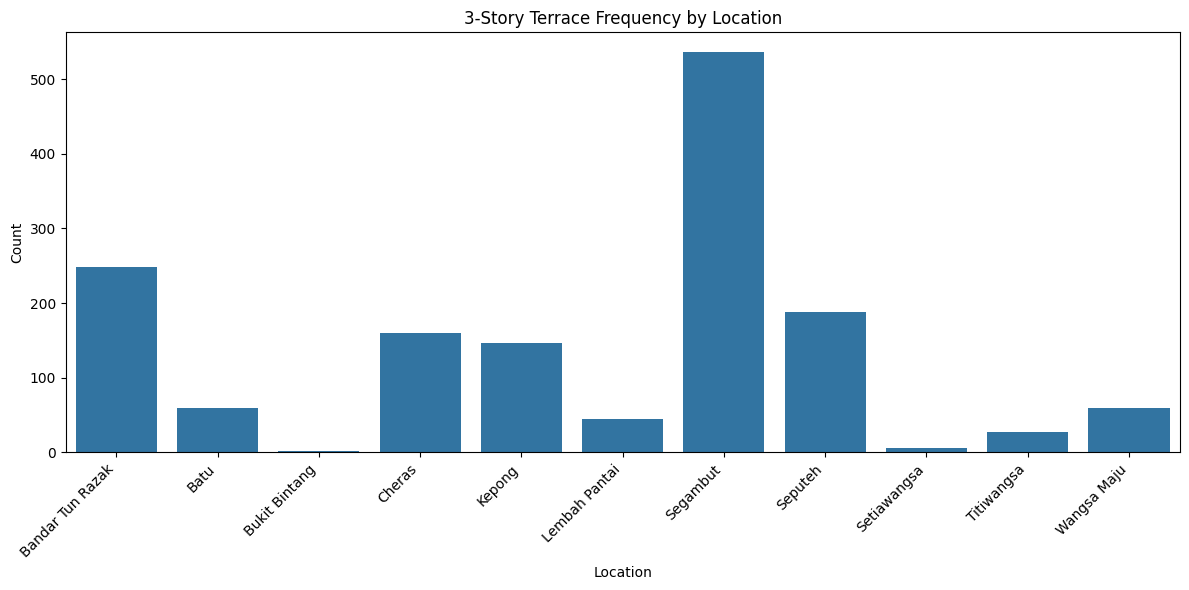

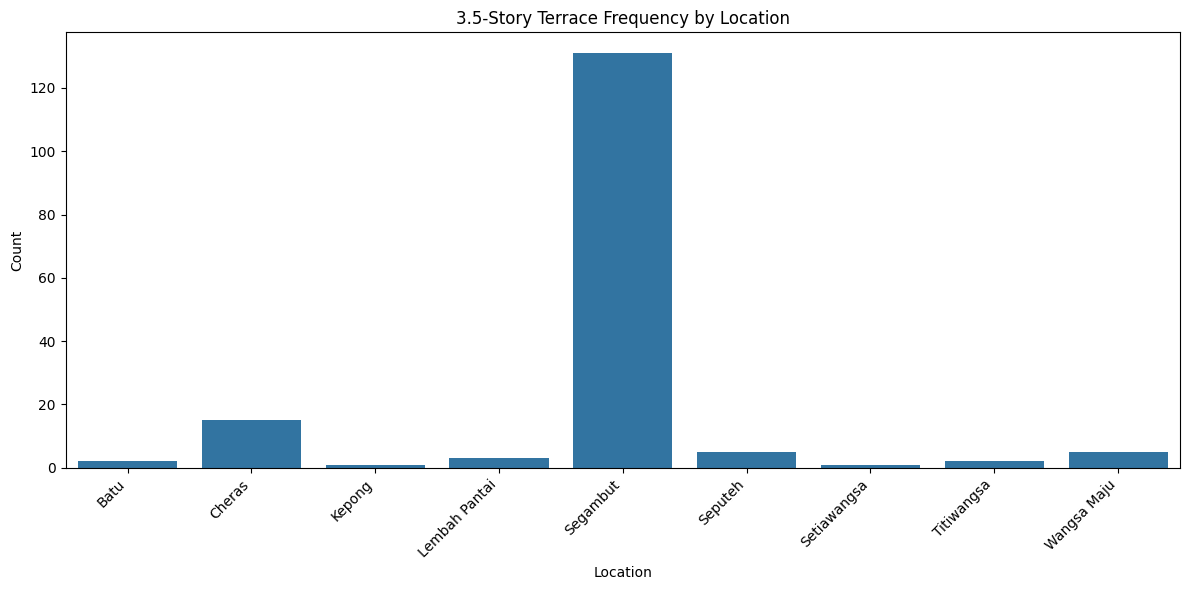

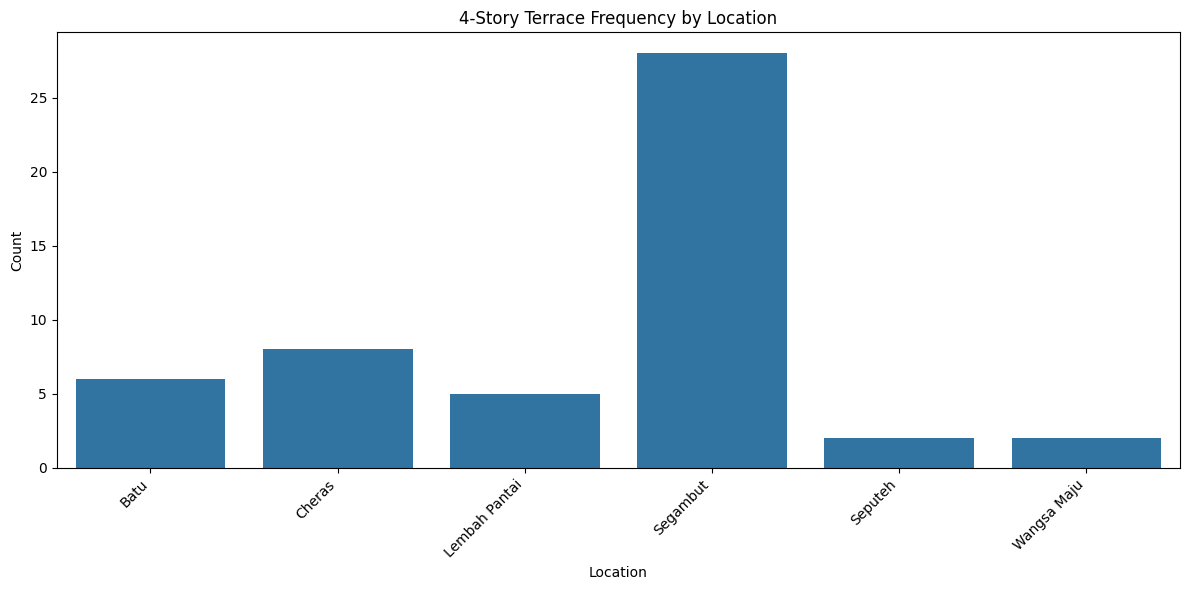

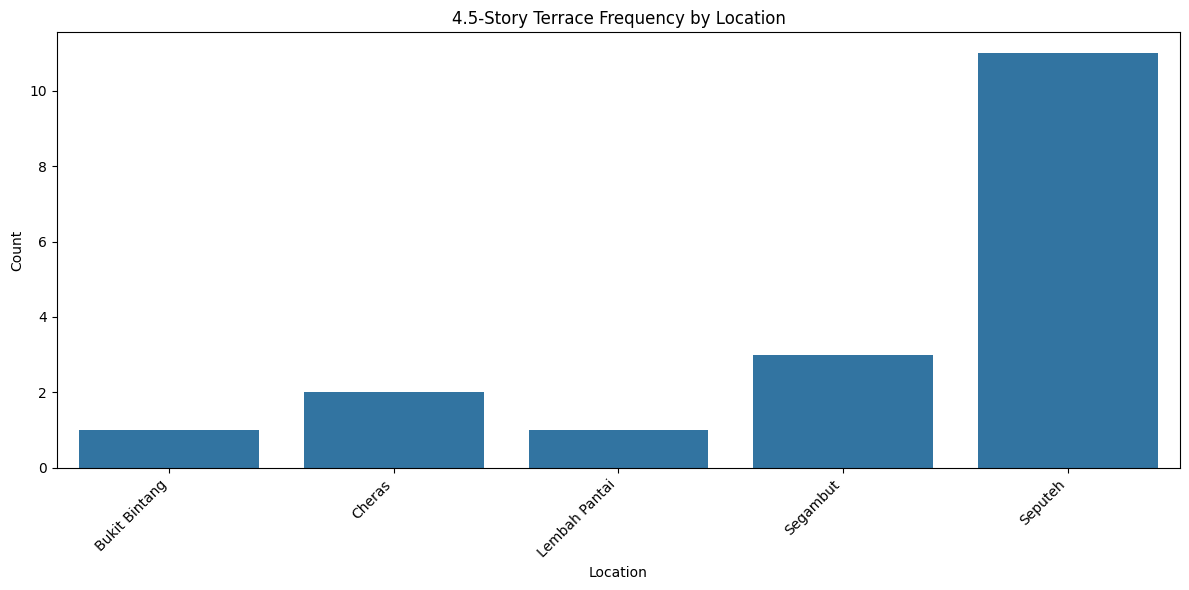

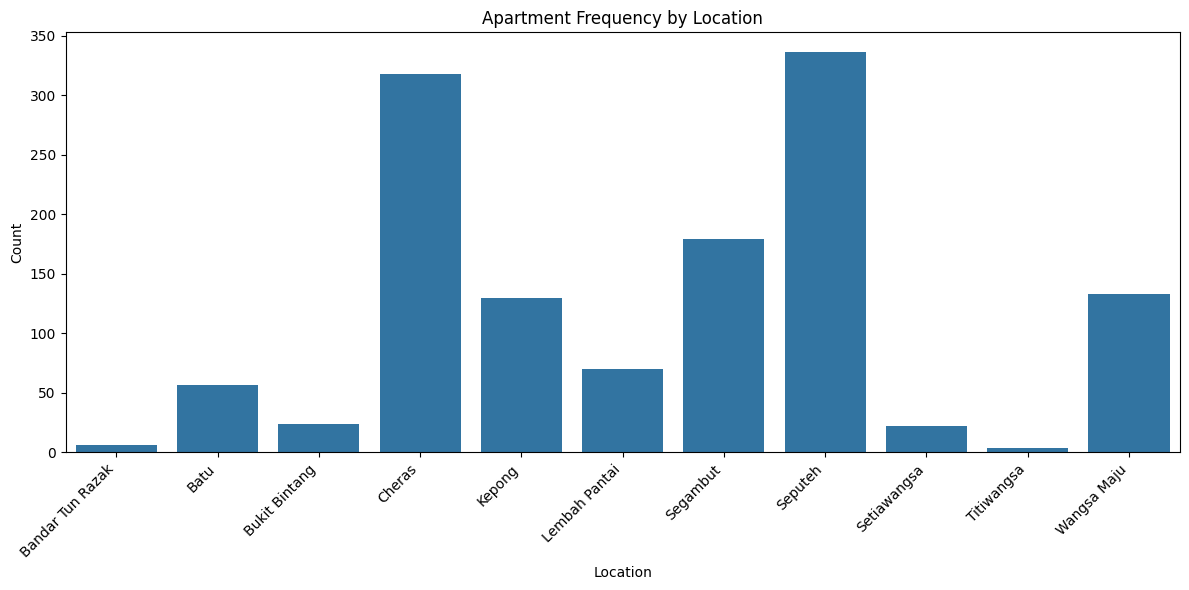

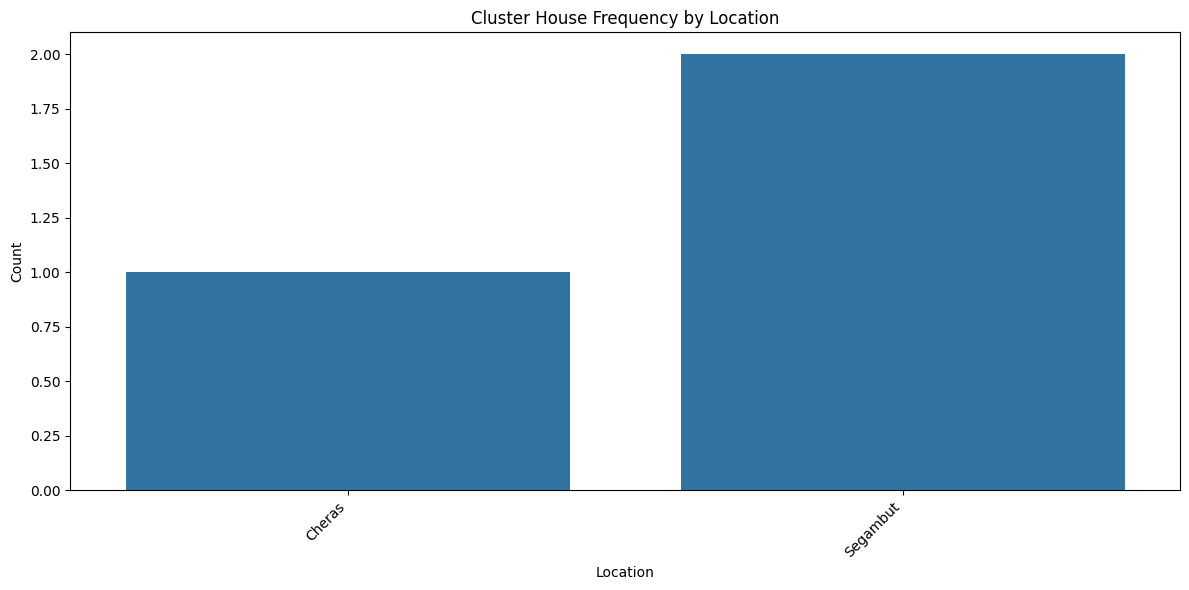

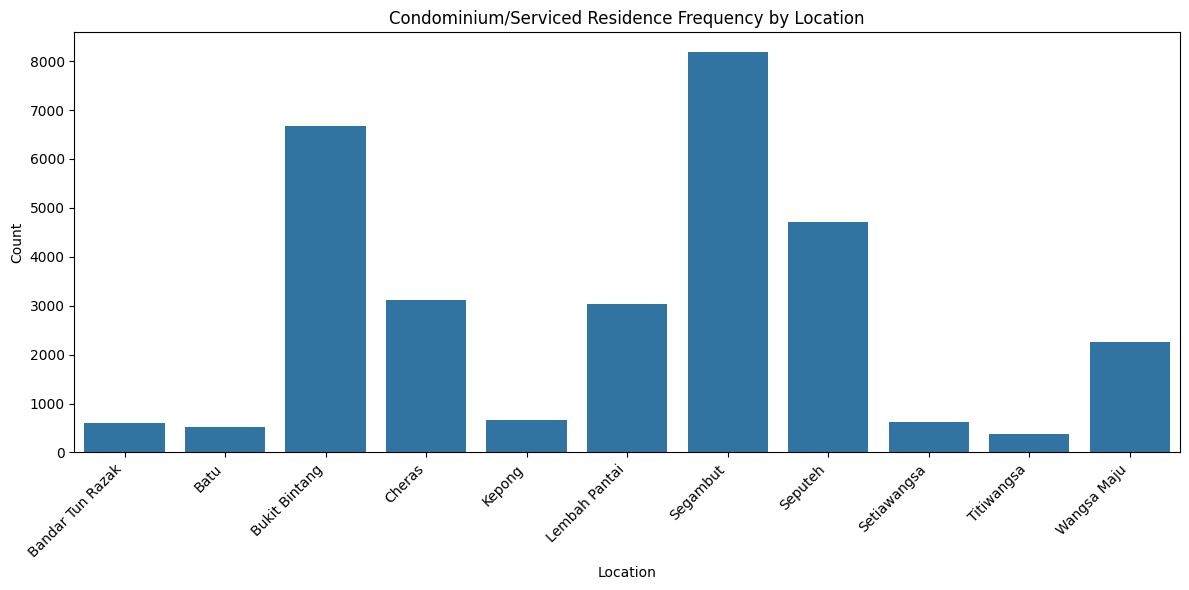

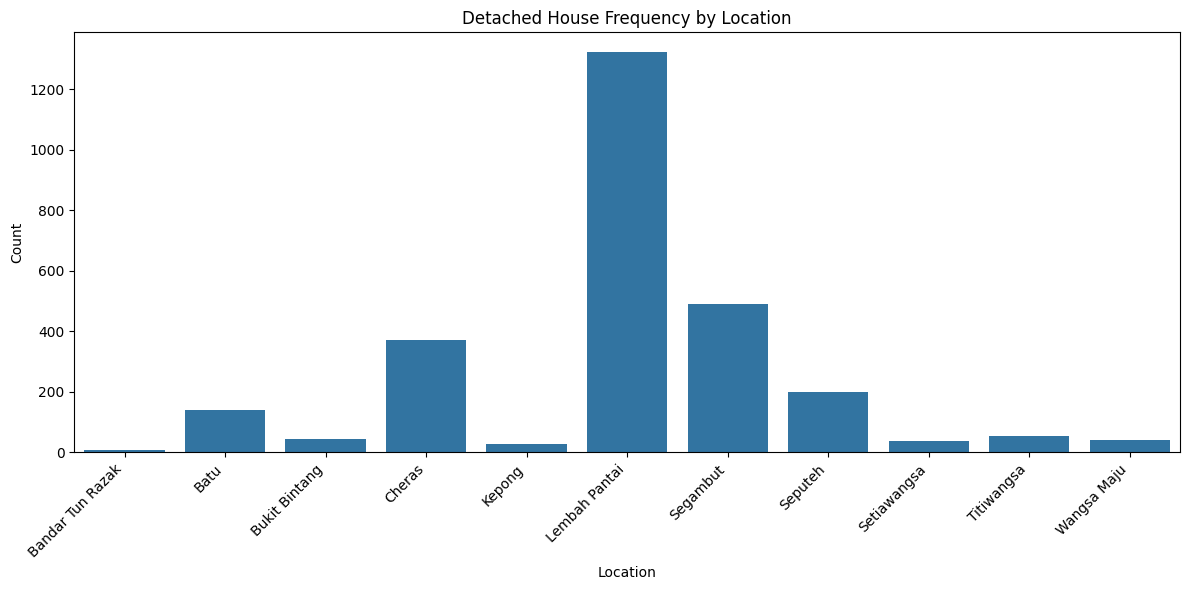

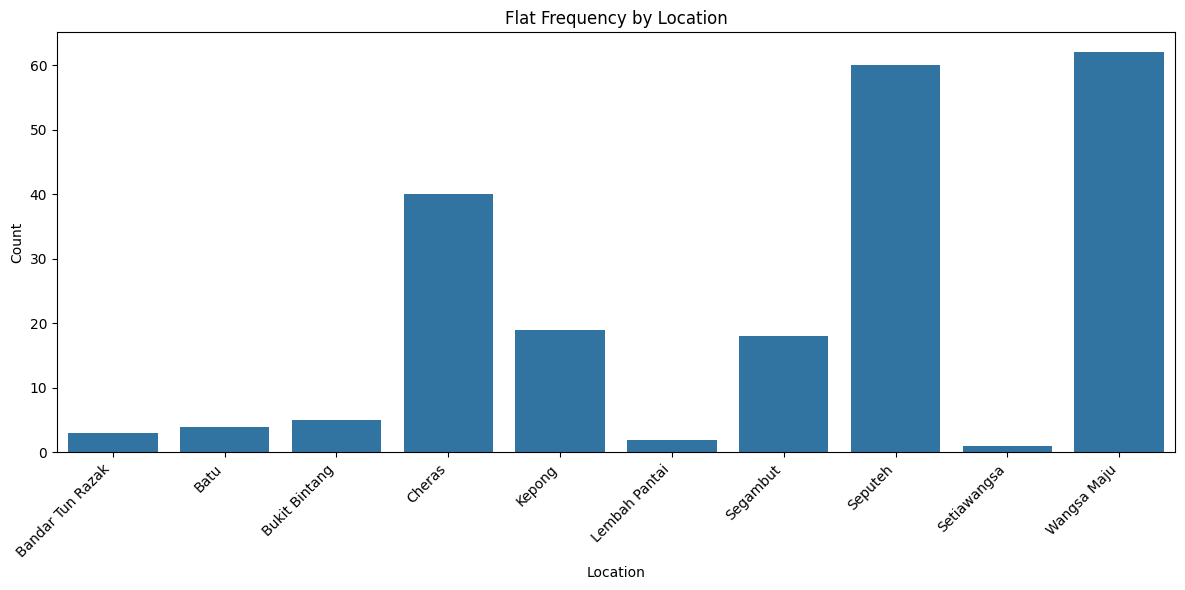

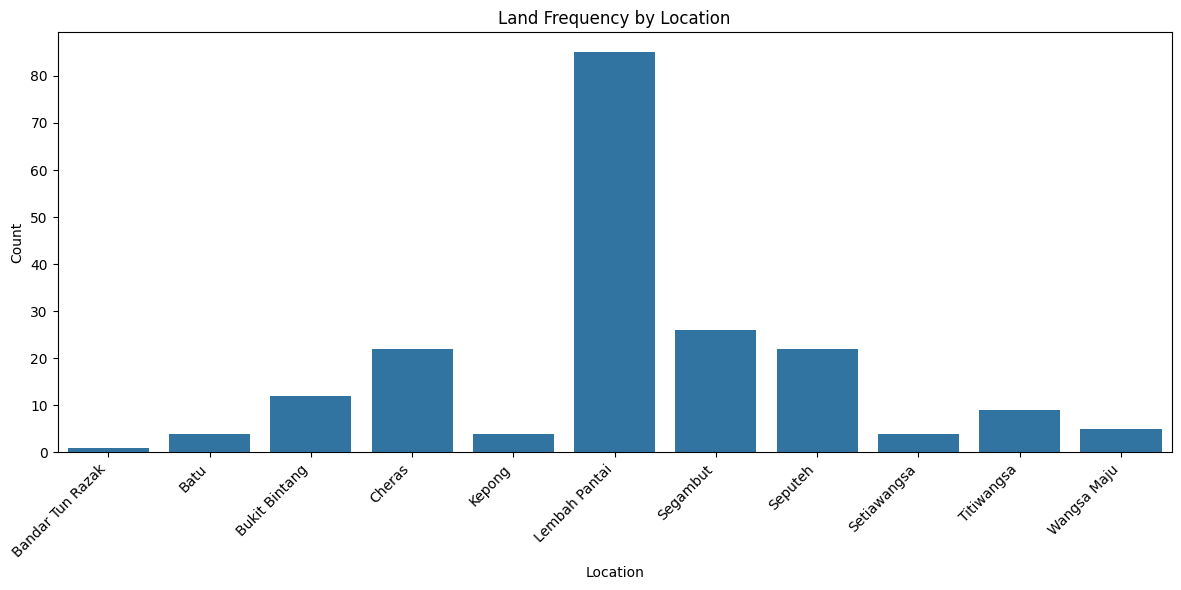

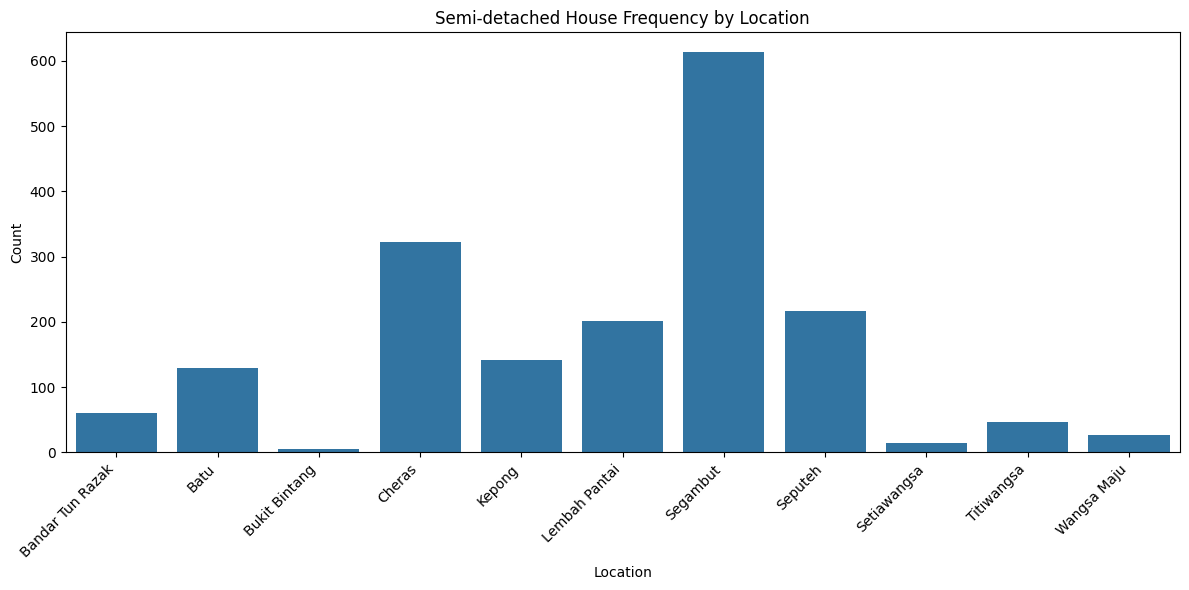

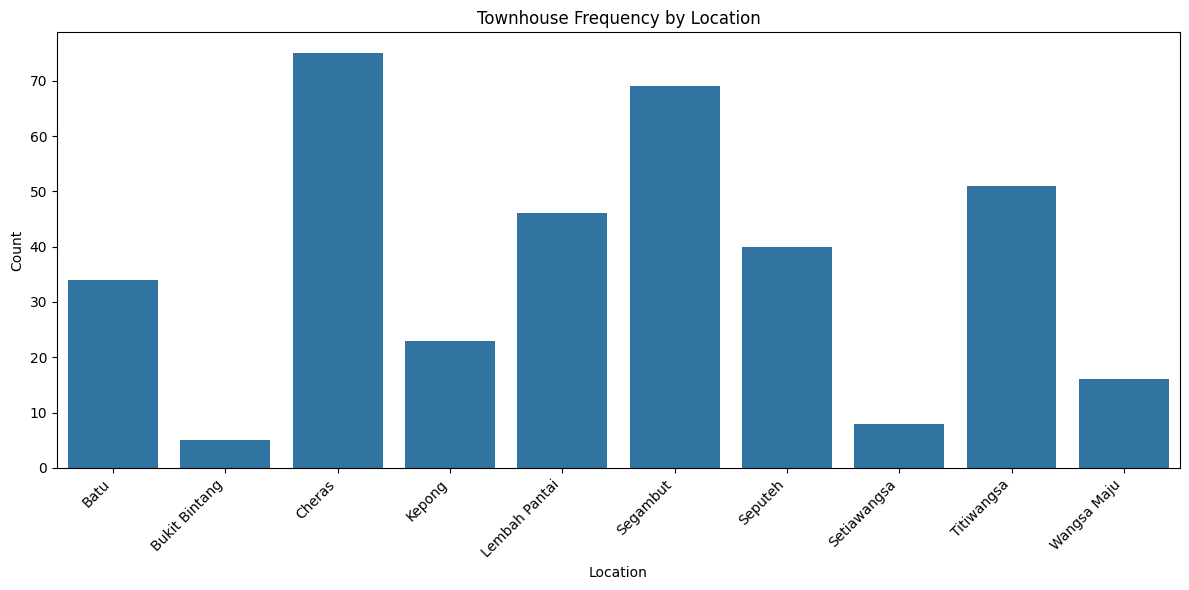

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

Due to lack of property types for several location, therefore, we combine property types category that are similar

Combine 1 ,1.5 story and Townhouse into 1-1.5 story.

*   Combine 1 ,1.5 story and Townhouse into 1-1.5 story.
*   Combine 2 and 2.5 story into 2-2.5 story
*   Combine 3, 3.5, 4, 4.5 story into 3+ stories
*   Remove the cluster house.
*   Combine land and semi-detached house.
*   Combine Flat and Apartment.

In [ ]:
# Combine property types
df['Property Type'] = df['Property Type'].replace({
    '1-Story Terrace': '1-1.5 Story',
    '1.5-Story Terrace': '1-1.5 Story',
    'Townhouse': '1-1.5 Story',
    '2-Story Terrace': '2-2.5 Story',
    '2.5-Story Terrace': '2-2.5 Story',
    '3-Story Terrace': '3+ Story',
    '3.5-Story Terrace': '3+ Story',
    '4-Story Terrace': '3+ Story',
    '4.5-Story Terrace': '3+ Story',
    'Semi-detached House': 'Semi-detached House/Land',
    'Land': 'Semi-detached House/Land',  # Combine Land with Semi-detached House
    'Apartment' : 'Apartment/Flat',
    'Flat': 'Apartment/Flat'  # Combine Flat with Apartment
})

# Remove Cluster House
df = df[df['Property Type'] != 'Cluster House']

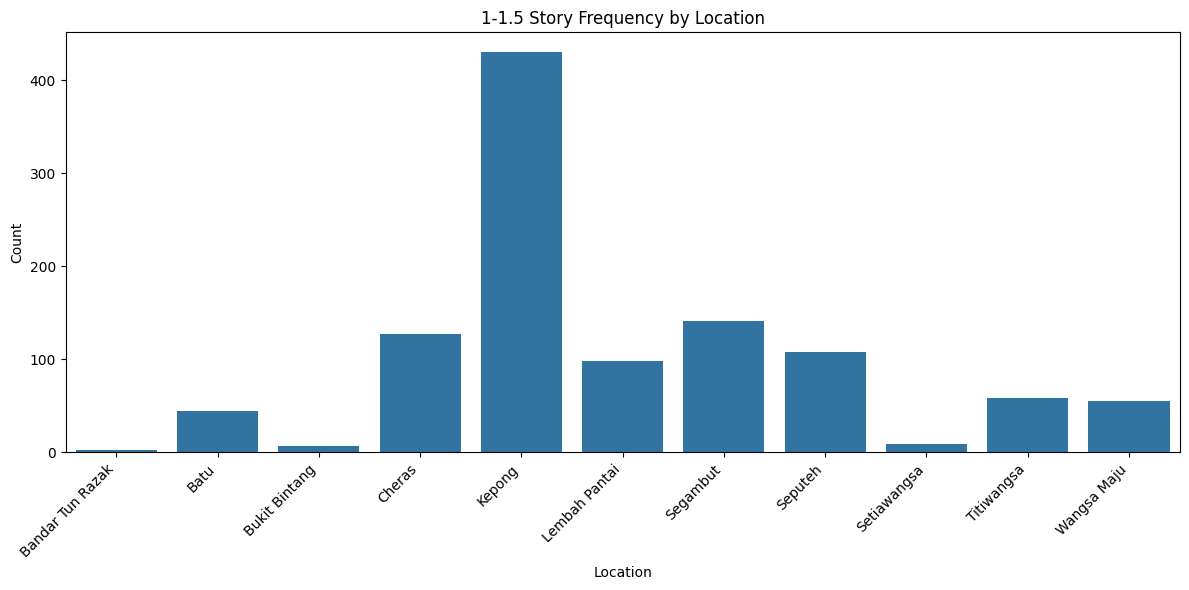

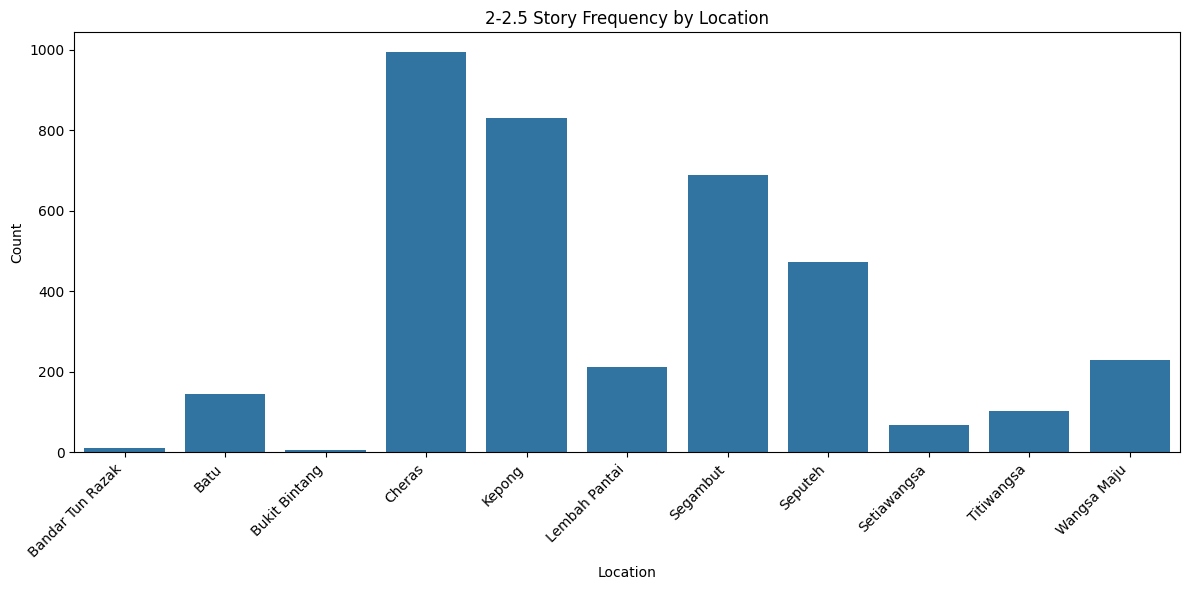

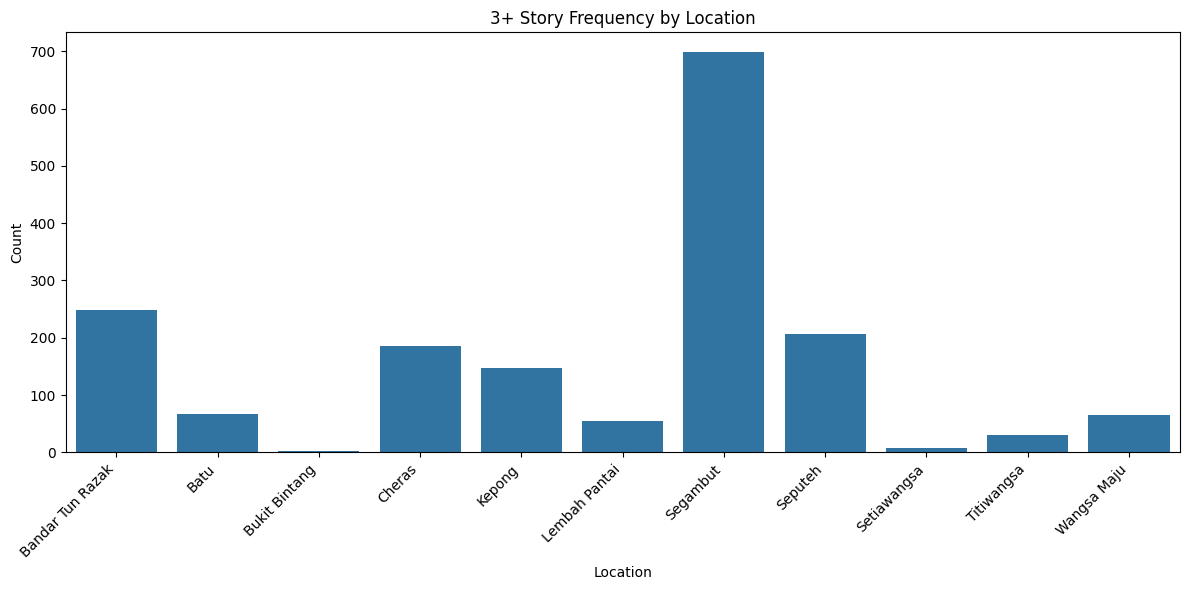

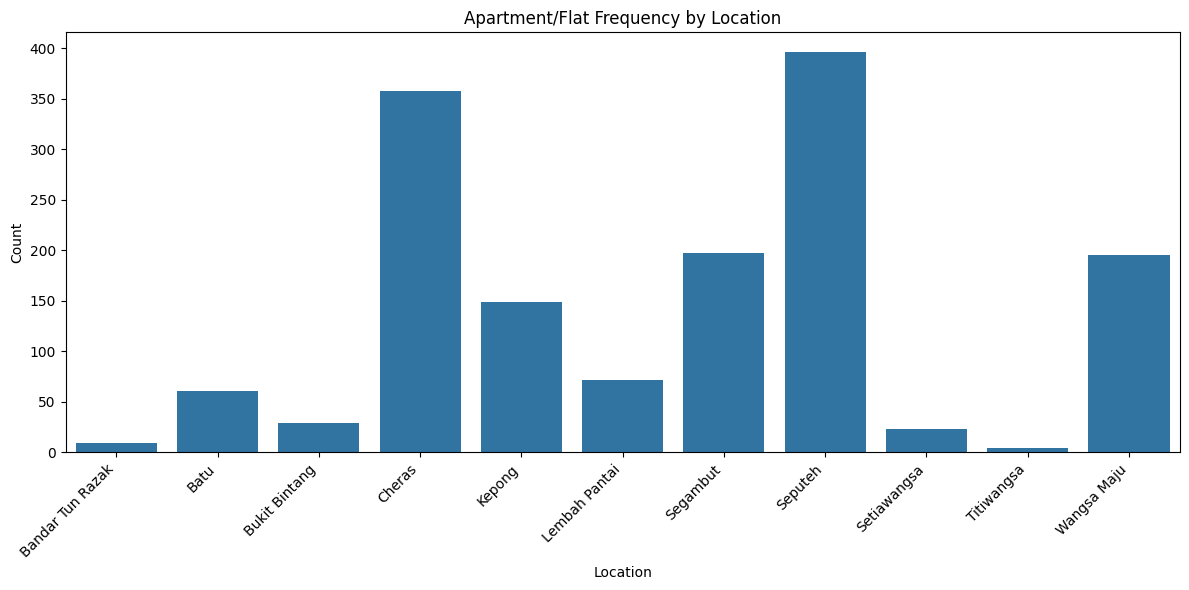

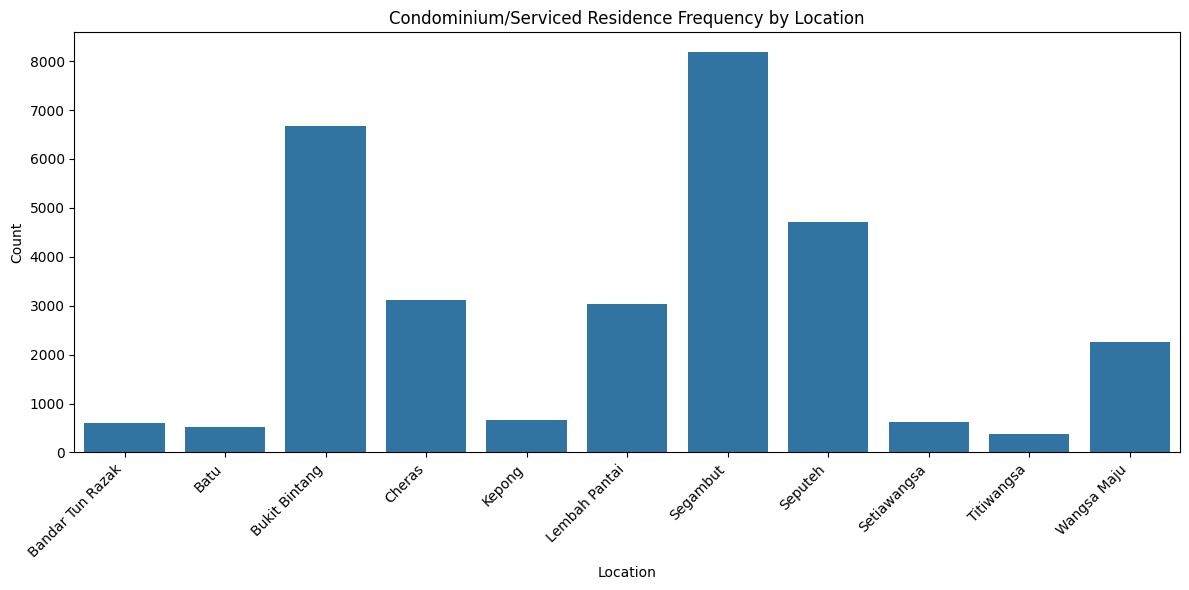

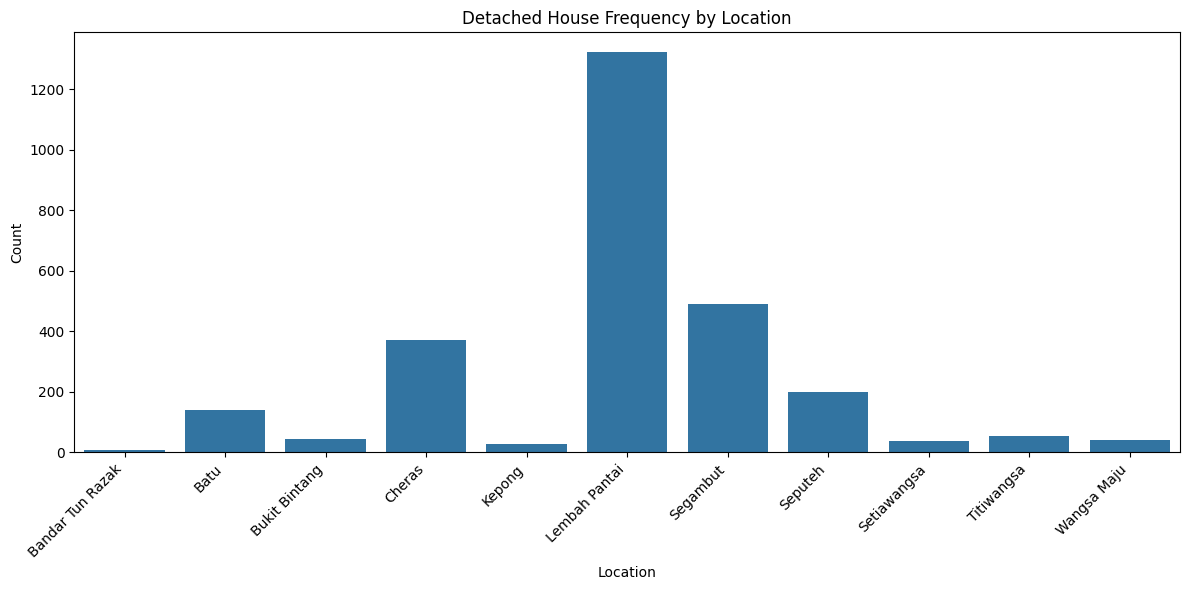

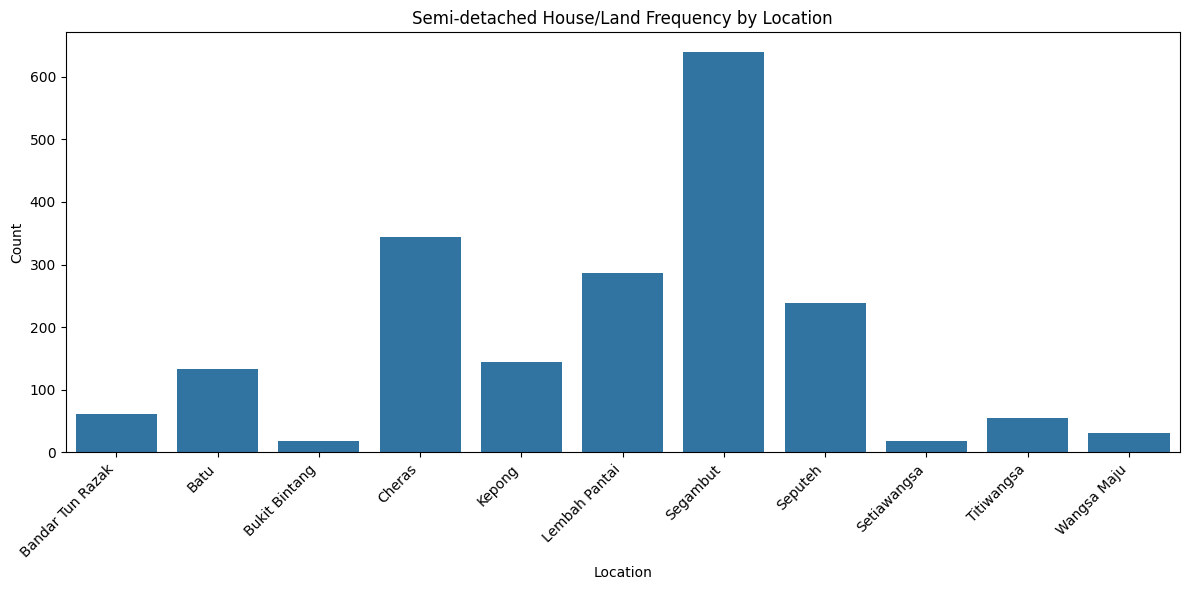

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

Split the size to size(sqft) and size category

In [ ]:
import pandas as pd
import re

def split_size(size_str):
    if pd.isna(size_str):
        return pd.Series({'size_type': None, 'size_value': None})

    # Check if it's built-up or land area
    if 'Built-up' in str(size_str):
        size_type = 'Built-Up'
    elif 'Land area' in str(size_str):
        size_type = 'Land Area'
    else:
        size_type = 'Unknown'

    # Extract numeric value
    match = re.search(r':\s*([\d,]+)', str(size_str))
    if match:
        size_value = match.group(1).replace(',', '')
        return pd.Series({'size_type': size_type, 'size_value': float(size_value)})

    return pd.Series({'size_type': size_type, 'size_value': None})

# Apply the splitting function to df
df[['Size Category', 'Size(sq.ft.)']] = df['Size'].apply(split_size)

# Display the first few rows of df to verify
print(df[['Location', 'Size', 'Size Category', 'Size(sq.ft.)']].head())

        Location                      Size Size Category  Size(sq.ft.)
0  Bukit Bintang  Built-up : 1,335 sq. ft.      Built-Up        1335.0
1  Lembah Pantai  Land area : 6900 sq. ft.     Land Area        6900.0
2       Segambut  Built-up : 1,875 sq. ft.      Built-Up        1875.0
4        Seputeh  Built-up : 1,513 sq. ft.      Built-Up        1513.0
5       Segambut  Land area : 7200 sq. ft.     Land Area        7200.0


In [ ]:
df = df.drop('Size', axis=1)  # To remove the 'Size' column from the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43519 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       43519 non-null  object 
 1   Price          43519 non-null  float64
 2   Rooms          43519 non-null  Int64  
 3   Bathrooms      43519 non-null  Int64  
 4   Property Type  43519 non-null  object 
 5   Furnishing     43519 non-null  object 
 6   Size Category  43519 non-null  object 
 7   Size(sq.ft.)   43476 non-null  float64
dtypes: Int64(2), float64(2), object(4)
memory usage: 3.1+ MB


Add the new column, Total Rooms and the new column(Price per sqft)

In [ ]:
# Add 'Total Rooms' column (assuming it's the sum of Rooms and Bathrooms)
df['Total Rooms'] = df['Rooms'] + df['Bathrooms']
df.drop(['Rooms', 'Bathrooms'], axis=1, inplace=True)

# Add 'Price per sqft' column
df['Price per sqft'] = df['Price'] / df['Size(sq.ft.)']

# Display the updated DataFrame
print(df.head())

        Location      Price                   Property Type        Furnishing  \
0  Bukit Bintang  1250000.0  Condominium/Serviced Residence   Fully Furnished   
1  Lembah Pantai  6800000.0                  Detached House  Partly Furnished   
2       Segambut  1030000.0  Condominium/Serviced Residence  Partly Furnished   
4        Seputeh   900000.0  Condominium/Serviced Residence  Partly Furnished   
5       Segambut  5350000.0                  Detached House  Partly Furnished   

  Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  
0      Built-Up        1335.0            6      936.329588  
1     Land Area        6900.0           13      985.507246  
2      Built-Up        1875.0            7      549.333333  
4      Built-Up        1513.0            8      594.844679  
5     Land Area        7200.0           11      743.055556  


# Exploratory Data Analysis


###Data Integration

Drop Derivable Data


First, we will check the correlations between the numerical values columns and do some changes if necessary.

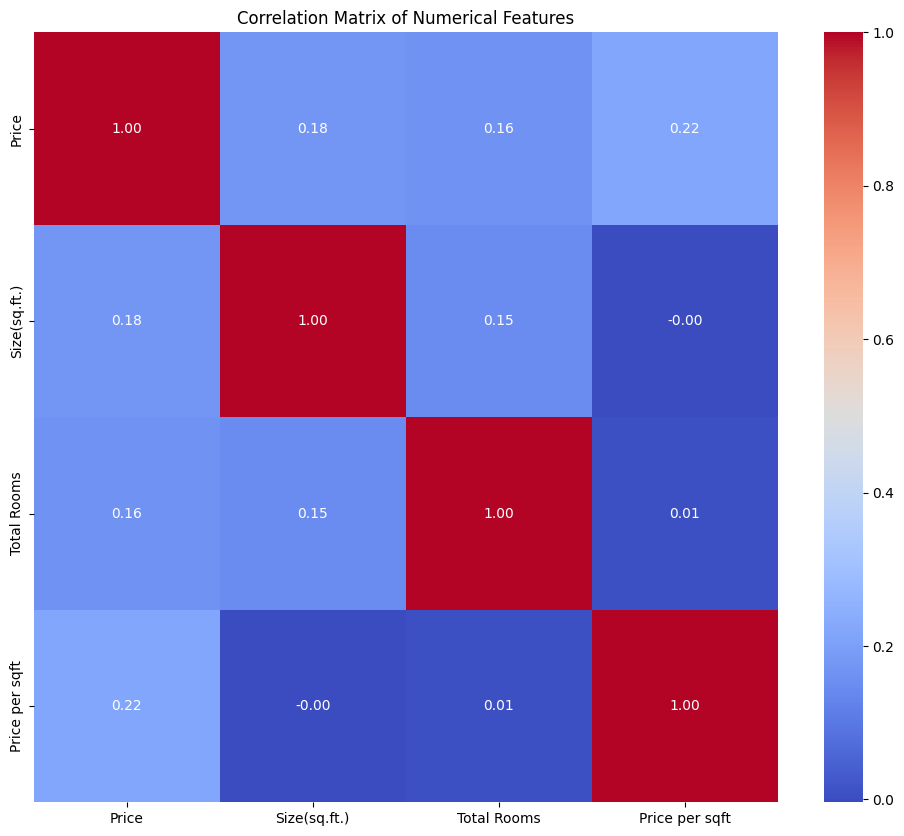

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There are no high correlation among numerical features, therefore no outliers needed to be remove.

###Data Reduction

Remove the outliers for the size(sqft) for each property types, since the size(sqft)for the property types should be similar.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
property_types = df['Property Type'].unique()

for property_type in property_types:
    data = df[df['Property Type'] == property_type]  # Filter data for the current property type

    if len(data) > 0:
        Q1 = data['Size(sq.ft.)'].quantile(0.25)
        Q3 = data['Size(sq.ft.)'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        outliers_removed_data = data[(data['Size(sq.ft.)'] >= lower_bound) & (data['Size(sq.ft.)'] <= upper_bound)]

        # Update the original DataFrame
        df = pd.concat([df[~df.index.isin(data.index)], outliers_removed_data])
        #This involves first dropping the rows corresponding to the `data` slice from the original dataframe and then adding back the filtered data for that slice.

print(f"Shape of DataFrame after removing outliers: {df.shape}")

Shape of DataFrame after removing outliers: (40067, 8)


How does price vary for different location? Let observe the boxplot and average of the price for each location(ignoring outliers)

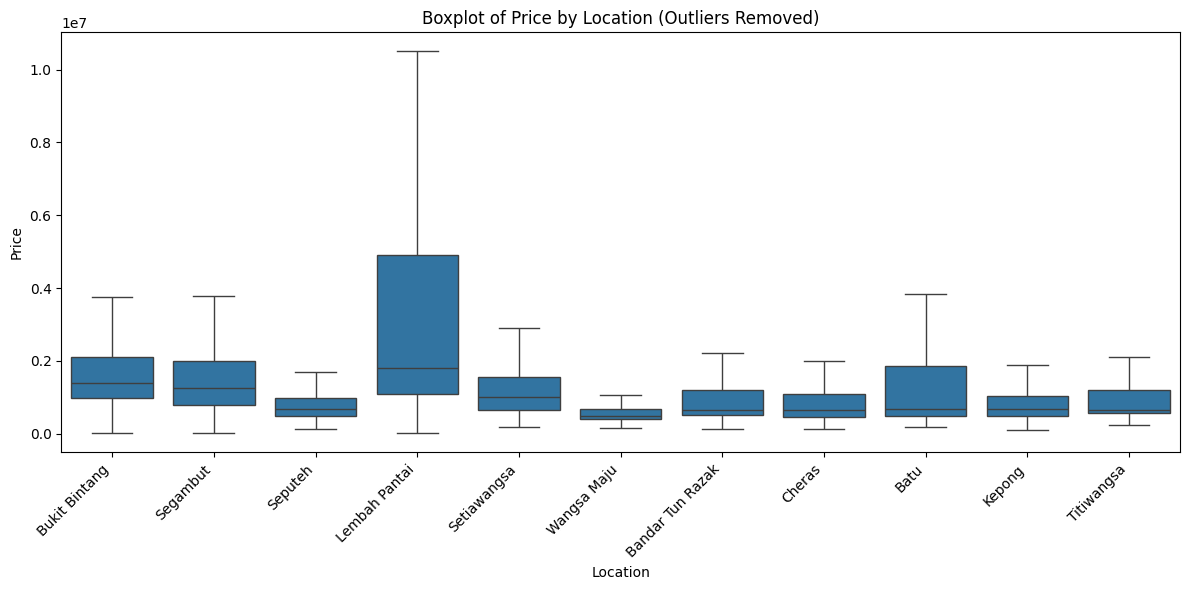

Average Price by Location (Ignoring Outliers):
Location
Bandar Tun Razak    9.630503e+05
Batu                1.270085e+06
Bukit Bintang       1.737039e+06
Cheras              1.085580e+06
Kepong              8.802720e+05
Lembah Pantai       3.546123e+06
Segambut            1.766536e+06
Seputeh             9.017679e+05
Setiawangsa         1.500684e+06
Titiwangsa          1.219646e+06
Wangsa Maju         6.328585e+05
Name: Price, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Location' and 'Price' columns

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='Location', y='Price', data=df, showfliers=False)  # showfliers=False to hide outliers
plt.title('Boxplot of Price by Location (Outliers Removed)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Calculate and print the average price for each location
average_prices = df.groupby('Location')['Price'].mean()
print("Average Price by Location (Ignoring Outliers):")
print(average_prices)

As you can see from here, Lembah Pantai have the highest boxplot and highest average among all location.


How does the price for each location vary from property type? Take Lembah Pantai(highest) and Wangsa Maju(lowest) as sample.
Do the boxplots(ignoring outliers) and the average.

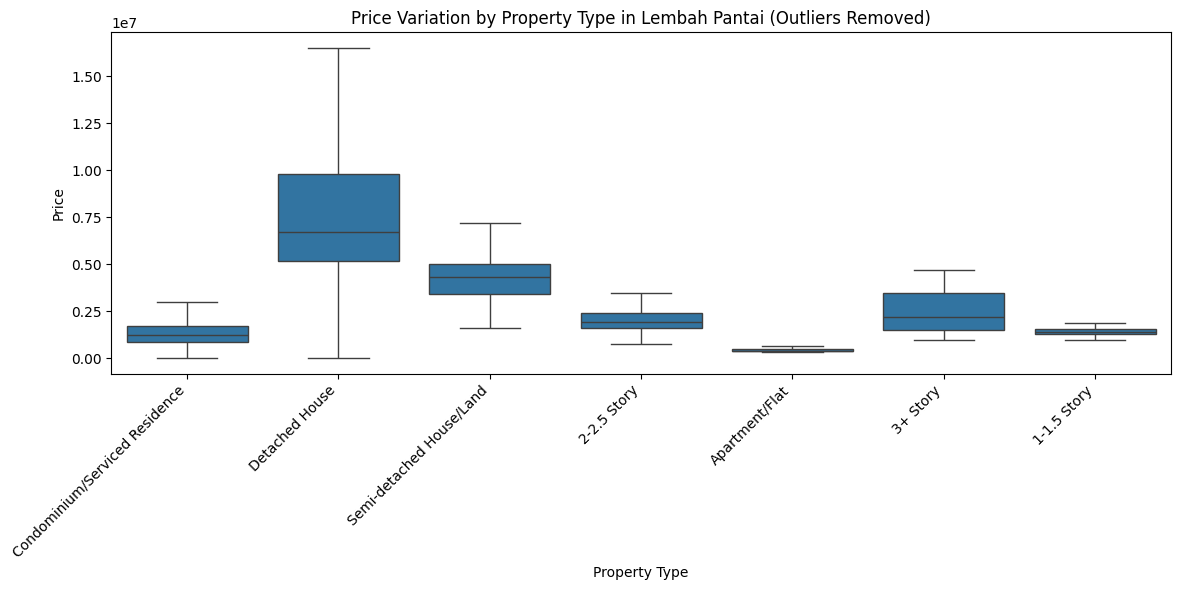

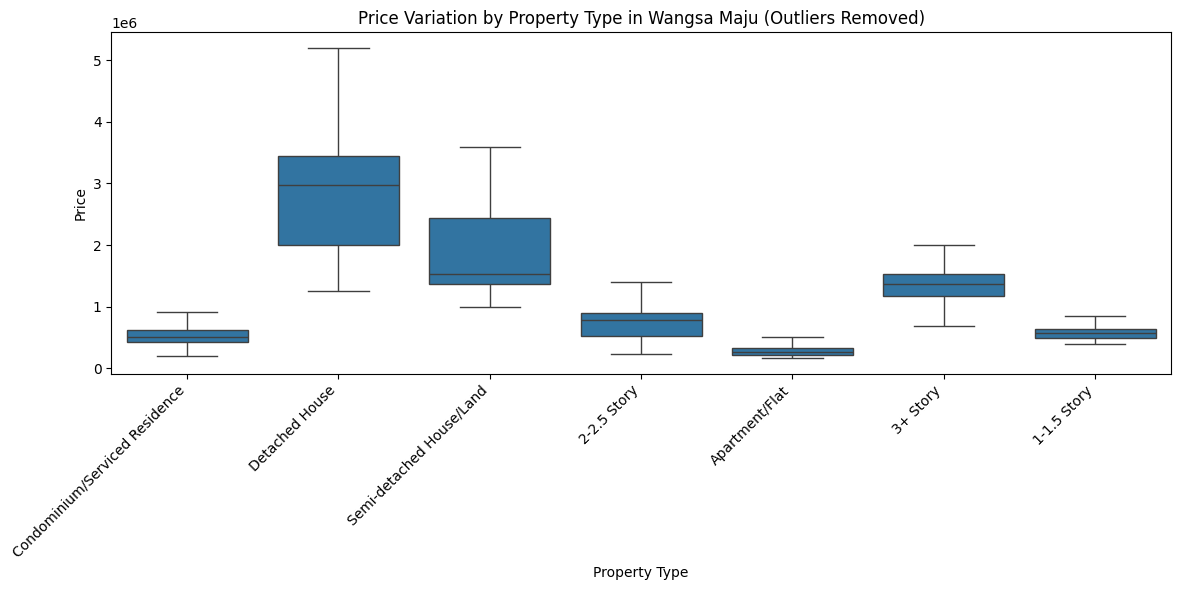

Average Price by Property Type in Lembah Pantai (Ignoring Outliers):
Property Type
1-1.5 Story                       1.499957e+06
2-2.5 Story                       2.005284e+06
3+ Story                          2.594052e+06
Apartment/Flat                    4.498039e+05
Condominium/Serviced Residence    1.415337e+06
Detached House                    7.982132e+06
Semi-detached House/Land          6.068699e+06
Name: Price, dtype: float64

Average Price by Property Type in Wangsa Maju (Ignoring Outliers):
Property Type
1-1.5 Story                       6.167455e+05
2-2.5 Story                       7.681142e+05
3+ Story                          1.356938e+06
Apartment/Flat                    2.834603e+05
Condominium/Serviced Residence    5.625665e+05
Detached House                    2.981463e+06
Semi-detached House/Land          2.372600e+06
Name: Price, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price' columns

# Filter data for Lembah Pantai and Wangsa Maju
lembah_pantai_data = df[df['Location'] == 'Lembah Pantai']
wangsa_maju_data = df[df['Location'] == 'Wangsa Maju']

# Create boxplots for each location, ignoring outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Price', data=lembah_pantai_data, showfliers=False)
plt.title('Price Variation by Property Type in Lembah Pantai (Outliers Removed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Price', data=wangsa_maju_data, showfliers=False)
plt.title('Price Variation by Property Type in Wangsa Maju (Outliers Removed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and print average prices for each property type in each location
lembah_pantai_avg_prices = lembah_pantai_data.groupby('Property Type')['Price'].mean()
wangsa_maju_avg_prices = wangsa_maju_data.groupby('Property Type')['Price'].mean()

print("Average Price by Property Type in Lembah Pantai (Ignoring Outliers):")
print(lembah_pantai_avg_prices)

print("\nAverage Price by Property Type in Wangsa Maju (Ignoring Outliers):")
print(wangsa_maju_avg_prices)

Detached house and most expensive for both, considering bungalow also detached house, therefore we know that we need to check for price for each location, for each property type.

What about the size, does that matter as well? therefore we will use the price per sqft column, to check the prices for each location, for each property type.

- Take Lembah Pantai's Detached House as example.

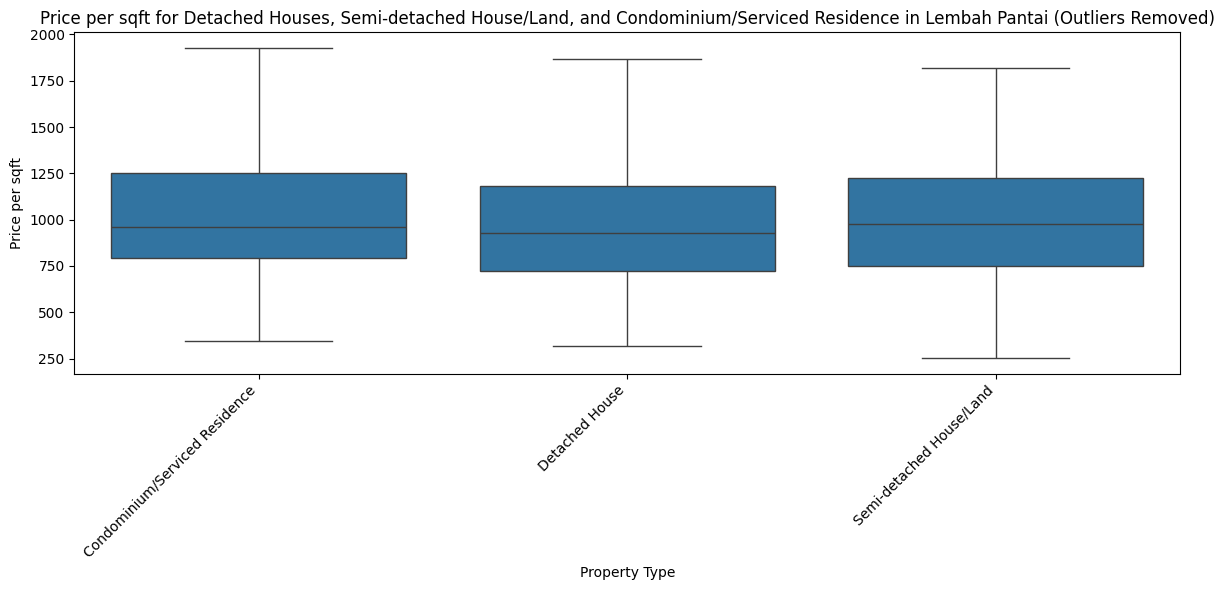

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price per sqft' columns

# Filter data for Lembah Pantai and the desired property types
filtered_data = df[(df['Location'] == 'Lembah Pantai') & (df['Property Type'].isin(['Detached House', 'Semi-detached House/Land', 'Condominium/Serviced Residence']))]

# Create boxplots for each property type, with outliers removed
plt.figure(figsize=(12, 6))  # Increased figure size for better readability
sns.boxplot(x='Property Type', y='Price per sqft', data=filtered_data, showfliers=False)
plt.title('Price per sqft for Detached Houses, Semi-detached House/Land, and Condominium/Serviced Residence in Lembah Pantai (Outliers Removed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now it is similar, so therefore we know that we have to remove the outliers based on price per sqft, for each property type, for each location.

From here we know that whenever we want to remove outliers, the location and property type are necessary to be included.

•Here we remove all outliers that is from the price per sqft for each property type, for each location

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    cleaned_df = df.copy()

    for _, group in df.groupby(group_cols):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        # Use boolean indexing to select rows within the bounds
        is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

        # Remove outliers from the cleaned DataFrame
        cleaned_df = cleaned_df.drop(group[is_outlier].index)

    return cleaned_df

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price per sqft' columns
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Price per sqft')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
53718     Titiwangsa   680000.0                     1-1.5 Story   
53764         Kepong   565000.0                     1-1.5 Story   
53800       Segambut  1380000.0                     1-1.5 Story   
53853           Batu  1500000.0                     1-1.5 Story   
53873         Kepong   499000.0                     1-1.5 Story   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38876 entries, 0 to 53873
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        38876 non-null  object 
 1   Price           38876 non-null  float64
 2   Property Type   38876 non-null  object 
 3   Furnishing      38876 non-null  object 
 4   Size Category   38876 non-null  object 
 5   Size(sq.ft.)    38876 non-null  float64
 6   Total Rooms     38876 non-null  Int64  
 7   Price per sqft  38876 non-null  float64
dtypes: Int64(1), float64(3), object(4)
memory usage: 2.7+ MB


•In general the larger sizes (in square feet) tend to have more total rooms. Therefore, we will first examine this relationship.

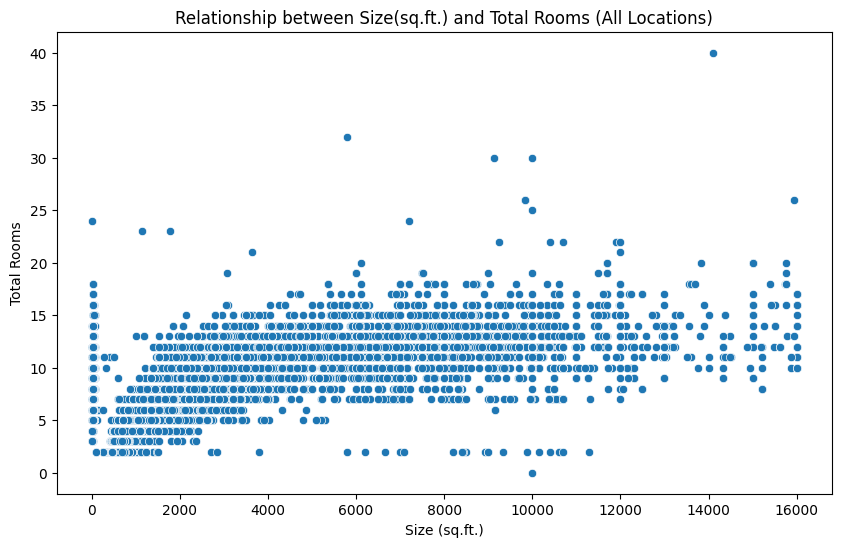

Correlation between Size(sq.ft.) and Total Rooms: 0.62


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot (Size vs. Total Rooms)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size(sq.ft.)', y='Total Rooms', data=df)
plt.title('Relationship between Size(sq.ft.) and Total Rooms (All Locations)')
plt.xlabel('Size (sq.ft.)')
plt.ylabel('Total Rooms')
plt.show()

# Calculate and print correlation (Size vs. Total Rooms)
correlation_size_rooms = df['Size(sq.ft.)'].corr(df['Total Rooms'])
print(f"Correlation between Size(sq.ft.) and Total Rooms: {correlation_size_rooms:.2f}")


Bigger size = more total rooms, therefore for each location, each property type, remove the outliers of Size vs Total Rooms.

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    cleaned_df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for _, group in df.groupby(group_cols):  # Iterate through groups based on specified columns
        Q1 = group[target_col].quantile(0.25)  # Calculate the first quartile (25th percentile)
        Q3 = group[target_col].quantile(0.75)  # Calculate the third quartile (75th percentile)
        IQR = Q3 - Q1  # Calculate the interquartile range (IQR)
        lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers

        # Filter out outliers for the current group
        # Use boolean indexing to select rows within the bounds
        is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

        # Remove outliers from the cleaned DataFrame
        cleaned_df = cleaned_df.drop(group[is_outlier].index)  # Drop rows identified as outliers

    return cleaned_df  # Return the cleaned DataFrame

# Remove outliers based on 'Total Rooms' for each location and property type
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Total Rooms')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
53718     Titiwangsa   680000.0                     1-1.5 Story   
53764         Kepong   565000.0                     1-1.5 Story   
53800       Segambut  1380000.0                     1-1.5 Story   
53853           Batu  1500000.0                     1-1.5 Story   
53873         Kepong   499000.0                     1-1.5 Story   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

Now that price per sqft for each location, each property type have no outliers, but since total rooms also affects the prices.

Therefore price/total rooms will be examine and the outliers will be removed for fair result.

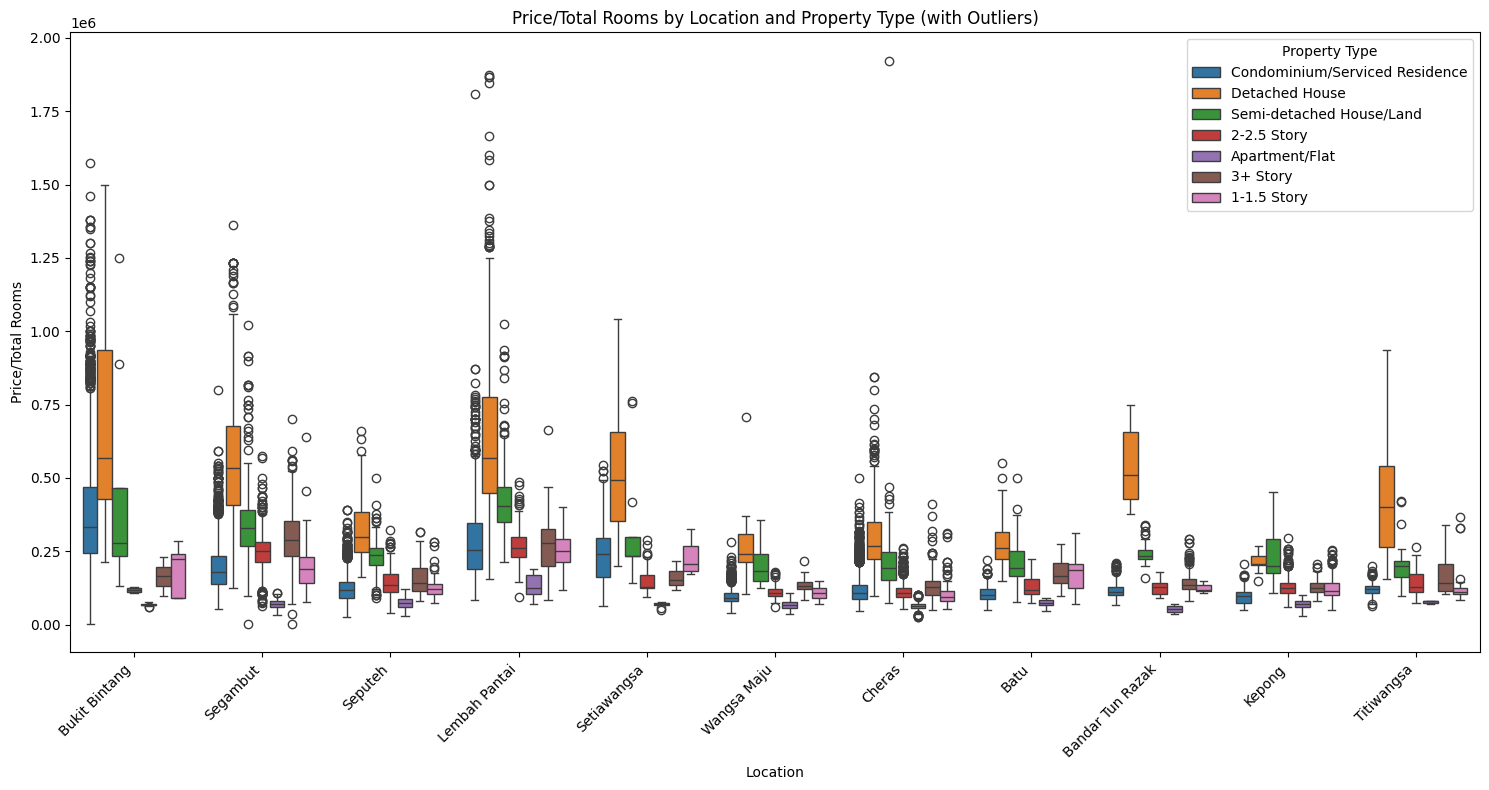

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price/Total Rooms' columns

# Create box plots with outliers
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
df['Price/Total Rooms'] = df['Price'] / df['Total Rooms']
sns.boxplot(x='Location', y='Price/Total Rooms', hue='Property Type', data=df, showfliers=True)  # showfliers=True to include outliers
plt.title('Price/Total Rooms by Location and Property Type (with Outliers)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Outliers can be seen in some locations, so we remove them using Price/Total Room for each location, each property type.

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_cols):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns,
    for multiple target columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_cols: A list of columns containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    # Instead of dropping within the loop, collect indices to drop
    indexes_to_drop = []

    for target_col in target_cols:  # Iterate through target columns
        for _, group in df.groupby(group_cols):
            Q1 = group[target_col].quantile(0.25)
            Q3 = group[target_col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers for the current group and target column
            is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

            # Collect indices of outliers instead of dropping immediately
            indexes_to_drop.extend(group[is_outlier].index)

    # Drop all collected indices at once outside the loops
    cleaned_df = df.drop(indexes_to_drop)

    return cleaned_df

# Remove outliers based on both 'Price per sqft' and 'Price per sqft/Total Rooms'
df = remove_outliers_by_group(df, ['Location', 'Property Type'], ['Price', 'Price/Total Rooms'])

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
4            Seputeh   900000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
53718     Titiwangsa   680000.0                     1-1.5 Story   
53764         Kepong   565000.0                     1-1.5 Story   
53800       Segambut  1380000.0                     1-1.5 Story   
53853           Batu  1500000.0                     1-1.5 Story   
53873         Kepong   499000.0                     1-1.5 Story   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

In general, the price of furnished houses > partly furnished > unfurnished(If same property price, same location, total rooms). Lets just the number of rows that disobey the rule.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', 'Furnishing', 'Total Rooms', 'Price', and 'Price per sqft' columns

# Create a set to store the indices of used rows
used_rows = set()

# Create a function to check if the price order is violated
def is_price_order_violated(group):
    global used_rows  # Access the global used_rows set

    # Filter out rows that have already been used
    group = group[~group.index.isin(used_rows)]

    # Get unique furnishing types in the group
    furnishing_types = group['Furnishing'].unique()

    # Check if all furnishing types (Fully Furnished, Partly Furnished, Unfurnished) are present
    if not all(furnishing_type in furnishing_types for furnishing_type in ['Fully Furnished', 'Partly Furnished', 'Unfurnished']):
        return False  # Price order not violated if not all furnishing types are present

    # Get prices for each furnishing type
    furnished_price = group[group['Furnishing'] == 'Fully Furnished']['Price'].values[0]
    partly_furnished_price = group[group['Furnishing'] == 'Partly Furnished']['Price'].values[0]
    unfurnished_price = group[group['Furnishing'] == 'Unfurnished']['Price'].values[0]

    # Check price order violation
    if (furnished_price <= partly_furnished_price) or \
       (partly_furnished_price <= unfurnished_price) or \
       (furnished_price <= unfurnished_price):
        # Add the indices of the used rows to the used_rows set
        used_rows.update(group.index)
        return True  # Price order violated
    else:
        return False  # Price order not violated

# Group data by property type, price, and size per sqft
grouped_data = df.groupby(['Property Type', 'Price', 'Price per sqft'])

# Filter groups where the price order is violated
violated_groups = grouped_data.filter(is_price_order_violated)

# Count the number of rows in the violated groups
num_violated_rows = len(violated_groups)

# Print the number of violated rows
print(f"Number of rows violating the price order: {num_violated_rows}")

Number of rows violating the price order: 1998


1753 may not be significant, but in order to make our dataset slightly more accurate, therefore we still remove these rows.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df_no_outliers'

# Create a copy of the DataFrame to avoid modifying the original
filtered_df = df.copy()

# Group by Location, Property Type and Total Rooms
grouped = filtered_df.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    fully_furnished_price = group[group['Furnishing'] == 'Fully Furnished']['Price'].min()
    partly_furnished_price = group[group['Furnishing'] == 'Partly Furnished']['Price'].min()
    unfurnished_price = group[group['Furnishing'] == 'Unfurnished']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(fully_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(fully_furnished_price) and pd.notna(partly_furnished_price) and partly_furnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Partly Furnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(partly_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > partly_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > partly_furnished_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df = filtered_df.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
22          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
53718     Titiwangsa   680000.0                     1-1.5 Story   
53764         Kepong   565000.0                     1-1.5 Story   
53800       Segambut  1380000.0                     1-1.5 Story   
53853           Batu  1500000.0                     1-1.5 Story   
53873         Kepong   499000.0                     1-1.5 Story   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

Build up vs land area, check the average, for each property type, for each location. (EDA, data reduction)

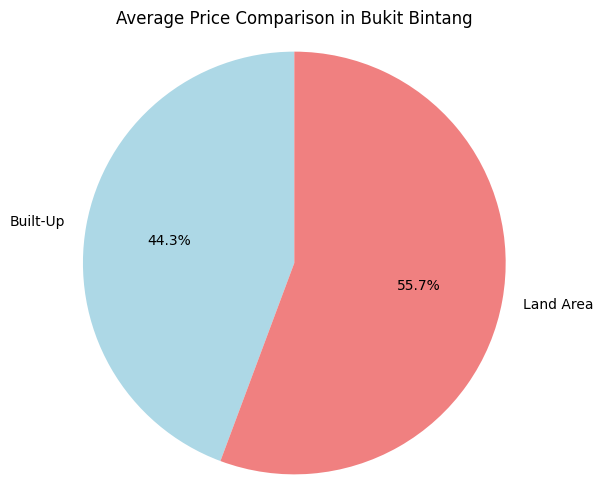

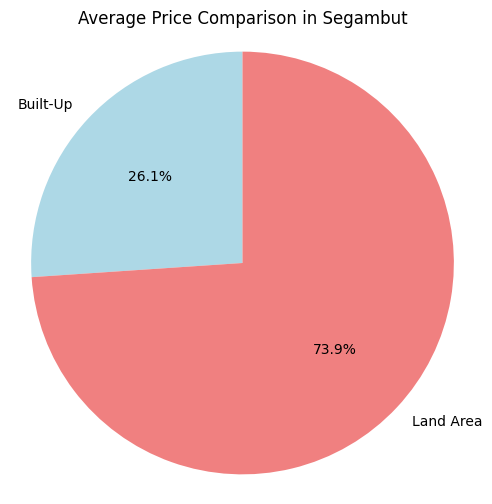

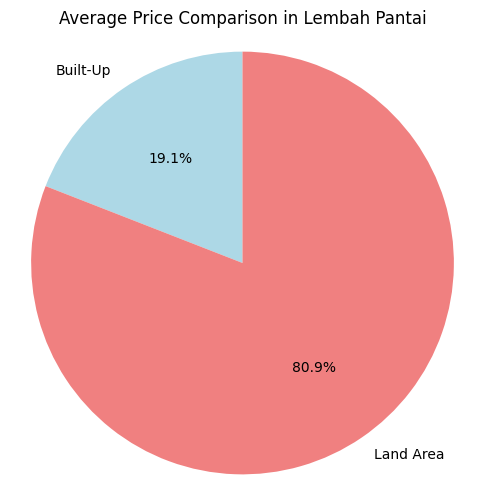

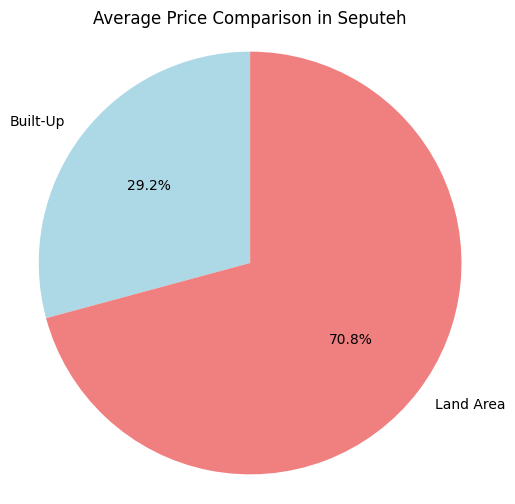

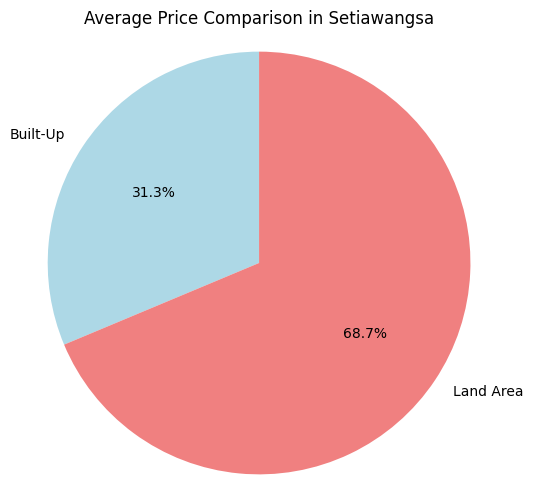

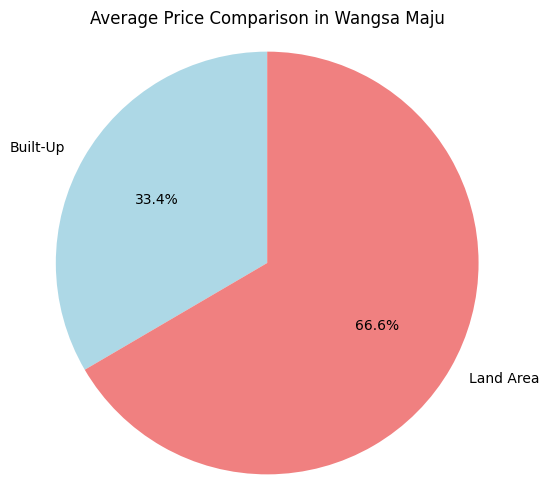

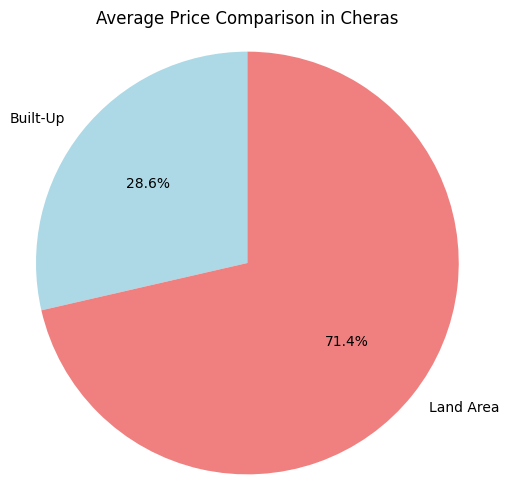

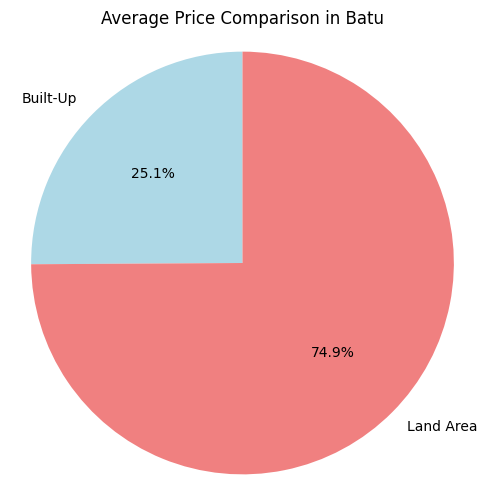

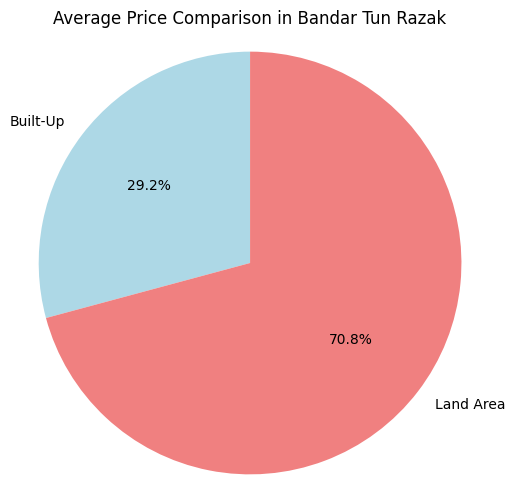

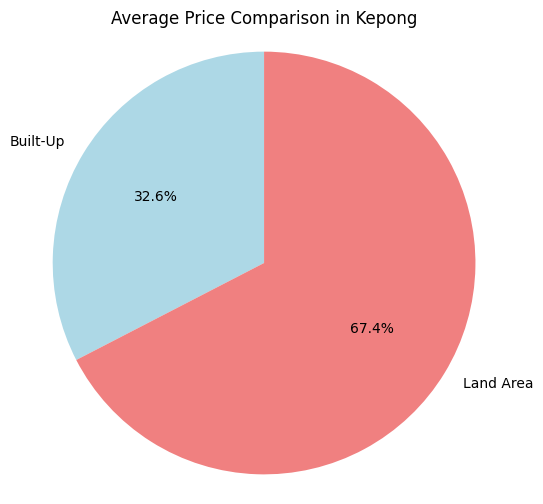

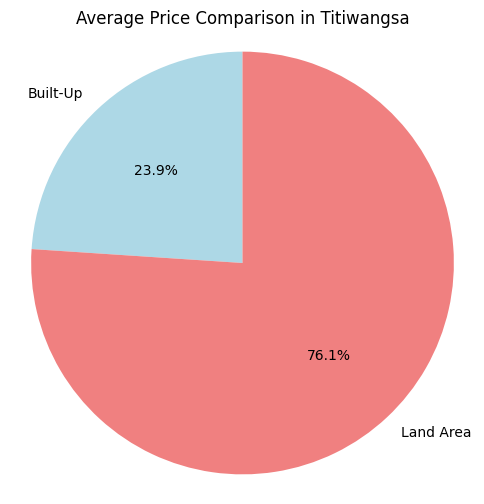

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'filtered_df'

# Get unique locations
locations = filtered_df['Location'].unique()

# Loop through locations and create pie charts
for location in locations:
    # Filter data for the current location
    location_data = filtered_df[filtered_df['Location'] == location]

    # Calculate average price for 'Built-Up' and 'Land Area' properties
    average_built_up_price = location_data[location_data['Size Category'] == 'Built-Up']['Price'].mean()
    average_land_area_price = location_data[location_data['Size Category'] == 'Land Area']['Price'].mean()

    # Create pie chart data
    labels = ['Built-Up', 'Land Area']
    sizes = [average_built_up_price, average_land_area_price]
    colors = ['lightblue', 'lightcoral']  # Choose colors

    # Create pie chart
    plt.figure(figsize=(6, 6))  # Adjust figure size as needed
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Average Price Comparison in {location}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Get unique locations
locations = filtered_df['Location'].unique()

# Loop through locations and calculate/compare average prices
for location in locations:
    # Filter data for the current location
    location_data = filtered_df[filtered_df['Location'] == location]

    # Calculate average price for 'Built-Up' properties in the location
    average_built_up_price = location_data[location_data['Size Category'] == 'Built-Up']['Price'].mean()

    # Calculate average price for 'Land Area' properties in the location
    average_land_area_price = location_data[location_data['Size Category'] == 'Land Area']['Price'].mean()

    # Print the results for the location
    print(f"Location: {location}")
    print(f"  Average Price for Built-Up Properties: {average_built_up_price:.2f}")
    print(f"  Average Price for Land Area Properties: {average_land_area_price:.2f}")

    # Compare the average prices for the location
    if average_built_up_price > average_land_area_price:
        print("  Built-Up properties have a higher average price in this location.")
    elif average_built_up_price < average_land_area_price:
        print("  Land Area properties have a higher average price in this location.")
    else:
        print("  Built-Up and Land Area properties have the same average price in this location.")

    print("-" * 30)  # Separator for better readability

Location: Bukit Bintang
  Average Price for Built-Up Properties: 1456612.86
  Average Price for Land Area Properties: 1830166.81
  Land Area properties have a higher average price in this location.
------------------------------
Location: Segambut
  Average Price for Built-Up Properties: 1230332.08
  Average Price for Land Area Properties: 3489388.28
  Land Area properties have a higher average price in this location.
------------------------------
Location: Lembah Pantai
  Average Price for Built-Up Properties: 1408831.97
  Average Price for Land Area Properties: 5976424.49
  Land Area properties have a higher average price in this location.
------------------------------
Location: Seputeh
  Average Price for Built-Up Properties: 628560.08
  Average Price for Land Area Properties: 1523700.49
  Land Area properties have a higher average price in this location.
------------------------------
Location: Setiawangsa
  Average Price for Built-Up Properties: 992722.94
  Average Price for Lan

Land area is more expensive, remove rows that are more expensive with build area, if property type, location and total rooms are the same.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Create a copy of the DataFrame to avoid modifying the original
filtered_df2 = filtered_df.copy()

# Group by Location, Property Type, and Total Rooms
grouped = filtered_df2.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    built_up_price = group[group['Size Category'] == 'Built-Up']['Price'].min()
    land_area_price = group[group['Size Category'] == 'Land Area']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(built_up_price) and pd.notna(land_area_price) and built_up_price > land_area_price:
        indexes_to_drop.extend(group[(group['Size Category'] == 'Built-Up') & (group['Price'] > land_area_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df2 = filtered_df2.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df2)

            Location      Price                   Property Type  \
0      Bukit Bintang  1250000.0  Condominium/Serviced Residence   
2           Segambut  1030000.0  Condominium/Serviced Residence   
18          Segambut  1780000.0  Condominium/Serviced Residence   
20          Segambut  1500000.0  Condominium/Serviced Residence   
22          Segambut  1500000.0  Condominium/Serviced Residence   
...              ...        ...                             ...   
53708       Segambut  1100000.0                     1-1.5 Story   
53718     Titiwangsa   680000.0                     1-1.5 Story   
53764         Kepong   565000.0                     1-1.5 Story   
53853           Batu  1500000.0                     1-1.5 Story   
53873         Kepong   499000.0                     1-1.5 Story   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0       Fully Furnished      Built-Up        1335.0            6   
2      Partly Furnished      Built-Up        1875.0        

The percentile of 25%, 50% and 75%, mean, median, mode standard deviation, variance, skewness and kurtosis value for the price, total rooms, Price/Total Rooms, Price per sqft, Size.

In [ ]:
import pandas as pd

# Assuming you have your DataFrame named filtered_df2
columns_of_interest = ['Price', 'Total Rooms', 'Price/Total Rooms', 'Price per sqft', 'Size(sq.ft.)']

# Calculate percentiles
percentiles = filtered_df2[columns_of_interest].quantile([0.25, 0.50, 0.75])

# Calculate other descriptive statistics
# Changed pd.Series.mode to lambda x: x.mode()[0] to handle single mode values
descriptive_stats = filtered_df2[columns_of_interest].agg(
    [
        'mean',
        'median',
        lambda x: x.mode()[0],  # Handle single mode values
        'std',
        'var',
        'skew',
        'kurt',
    ]
)

# Display the results
print("Percentiles:\n", percentiles)
print("\nDescriptive Statistics:\n", descriptive_stats)

Percentiles:
           Price  Total Rooms  Price/Total Rooms  Price per sqft  Size(sq.ft.)
0.25   569000.0          5.0      108333.333333      504.615385         891.0
0.50   860000.0          5.0           160000.0      718.954248        1184.0
0.75  1550000.0          7.0      263636.363636     1095.611285        1625.0

Descriptive Statistics:
                  Price  Total Rooms  Price/Total Rooms  Price per sqft  \
mean      1.411374e+06     6.276983       2.104332e+05    5.829564e+03   
median    8.600000e+05     5.000000       1.600000e+05    7.189542e+02   
<lambda>  1.200000e+06     5.000000       1.500000e+05    1.000000e+03   
std       1.663371e+06     2.712059       1.513206e+05    1.718732e+04   
var       2.766802e+12     7.355262       2.289791e+10    2.954040e+08   
skew      3.896485e+00     1.122869       2.139847e+00    4.304606e+00   
kurt      1.948691e+01     1.306792       6.239083e+00    2.321362e+01   

          Size(sq.ft.)  
mean      1.665368e+03  
media

The percentage of location distribution, property type distribution, the furnishing distribution and the size category distribution

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Calculate percentage distribution for Location
location_distribution = df['Location'].value_counts(normalize=True) * 100
print("Location Distribution (%):\n", location_distribution)

# Calculate percentage distribution for Property Type
property_type_distribution = df['Property Type'].value_counts(normalize=True) * 100
print("\nProperty Type Distribution (%):\n", property_type_distribution)

# Calculate percentage distribution for Furnishing
furnishing_distribution = df['Furnishing'].value_counts(normalize=True) * 100
print("\nFurnishing Distribution (%):\n", furnishing_distribution)

# Calculate percentage distribution for Size Category
size_category_distribution = df['Size Category'].value_counts(normalize=True) * 100
print("\nSize Category Distribution (%):\n", size_category_distribution)

Location Distribution (%):
 Location
Segambut            26.289312
Seputeh             16.397401
Bukit Bintang       15.098028
Cheras              11.513252
Lembah Pantai       11.372391
Wangsa Maju          6.706721
Kepong               5.185994
Batu                 2.636118
Bandar Tun Razak     2.135917
Titiwangsa           1.333870
Setiawangsa          1.330995
Name: proportion, dtype: float64

Property Type Distribution (%):
 Property Type
Condominium/Serviced Residence    71.152188
2-2.5 Story                        7.528891
Detached House                     6.381878
Semi-detached House/Land           4.619675
3+ Story                           4.424194
Apartment/Flat                     3.222561
1-1.5 Story                        2.670615
Name: proportion, dtype: float64

Furnishing Distribution (%):
 Furnishing
Partly Furnished    56.220893
Fully Furnished     31.348818
Unfurnished         12.430288
Name: proportion, dtype: float64

Size Category Distribution (%):
 Size Categor

For all numerical columns, data type, range, min value, max value, unique values, null values and the outliers

In [ ]:
import pandas as pd
import numpy as np

def get_outlier_bounds(data):
    """Calculates outlier bounds using the IQR method."""
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def get_numerical_col_info(df):
    """Gets information for numerical columns."""
    numerical_cols = df.select_dtypes(include=np.number).columns
    info_dict = {}
    for col in numerical_cols:
        data = df[col]
        lower_bound, upper_bound = get_outlier_bounds(data)  # Get outlier bounds
        info_dict[col] = {
            "Data Type": data.dtype,
            "Range": data.max() - data.min(),
            "Min Value": data.min(),
            "Max Value": data.max(),
            "Unique Values": data.nunique(),
            "Null Values": data.isnull().sum(),
            "Outlier Bounds": f"Lower: {lower_bound}, Upper: {upper_bound}" # Display bounds
        }
    return info_dict

# Get the information
numerical_col_info = get_numerical_col_info(filtered_df2)

# Print the information (or you can further process it as needed)
for col, info in numerical_col_info.items():
    print(f"Column: {col}")
    for key, value in info.items():
        print(f"  {key}: {value}")
    print("\n")

Column: Price
  Data Type: float64
  Range: 14989000.0
  Min Value: 11000.0
  Max Value: 15000000.0
  Unique Values: 2187
  Null Values: 0
  Outlier Bounds: Lower: -902500.0, Upper: 3021500.0


Column: Size(sq.ft.)
  Data Type: float64
  Range: 15988.0
  Min Value: 12.0
  Max Value: 16000.0
  Unique Values: 2443
  Null Values: 0
  Outlier Bounds: Lower: -210.0, Upper: 2726.0


Column: Total Rooms
  Data Type: Int64
  Range: 17
  Min Value: 2
  Max Value: 19
  Unique Values: 18
  Null Values: 0
  Outlier Bounds: Lower: 2.0, Upper: 10.0


Column: Price per sqft
  Data Type: float64
  Range: 223349.10254452928
  Min Value: 6.997455470737913
  Max Value: 223356.1
  Unique Values: 14766
  Null Values: 0
  Outlier Bounds: Lower: -381.8784663612247, Upper: 1982.105136243067


Column: Price/Total Rooms
  Data Type: Float64
  Range: 1397800.0
  Min Value: 2200.0
  Max Value: 1400000.0
  Unique Values: 3697
  Null Values: 0
  Outlier Bounds: Lower: -124621.21212121217, Upper: 496590.9090909092



For all categorical datas, the unique values and null values.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Number of Null Values: {df[col].isnull().sum()}")
    print("-" * 20)

Column: Location
Number of Unique Values: 11
Number of Null Values: 0
--------------------
Column: Property Type
Number of Unique Values: 7
Number of Null Values: 0
--------------------
Column: Furnishing
Number of Unique Values: 3
Number of Null Values: 0
--------------------
Column: Size Category
Number of Unique Values: 2
Number of Null Values: 0
--------------------


###Data Transformation

####Normalization









*   Standard Scaler




In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your DataFrame is named 'filtered_df2'
# (from the previous response where outliers were removed)

# Select numerical features for scaling/normalization
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Normalization (Standardization)
# Create a new DataFrame for normalized data to keep both versions
normalized_df = filtered_df2.copy()
normalizer = StandardScaler()
normalized_df[numerical_features] = normalizer.fit_transform(normalized_df[numerical_features])

# Display the scaled and normalized DataFrames (optional)
print("Scaled DataFrame:")
print(scaled_df.head())
print("\nNormalized DataFrame:")
print(normalized_df.head())

Scaled DataFrame:
         Location     Price                   Property Type        Furnishing  \
0   Bukit Bintang  0.082661  Condominium/Serviced Residence   Fully Furnished   
2        Segambut  0.067983  Condominium/Serviced Residence  Partly Furnished   
18       Segambut  0.118020  Condominium/Serviced Residence  Partly Furnished   
20       Segambut  0.099340  Condominium/Serviced Residence  Partly Furnished   
22       Segambut  0.099340  Condominium/Serviced Residence   Fully Furnished   

   Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  
0       Built-Up      0.082750     0.235294        0.004161           0.147470  
2       Built-Up      0.116525     0.294118        0.002428           0.103694  
18      Built-Up      0.113710     0.411765        0.004324           0.139918  
20      Built-Up      0.111709     0.411765        0.003704           0.117661  
22      Built-Up      0.134538     0.352941        0.003074           0.132565  

Normaliz

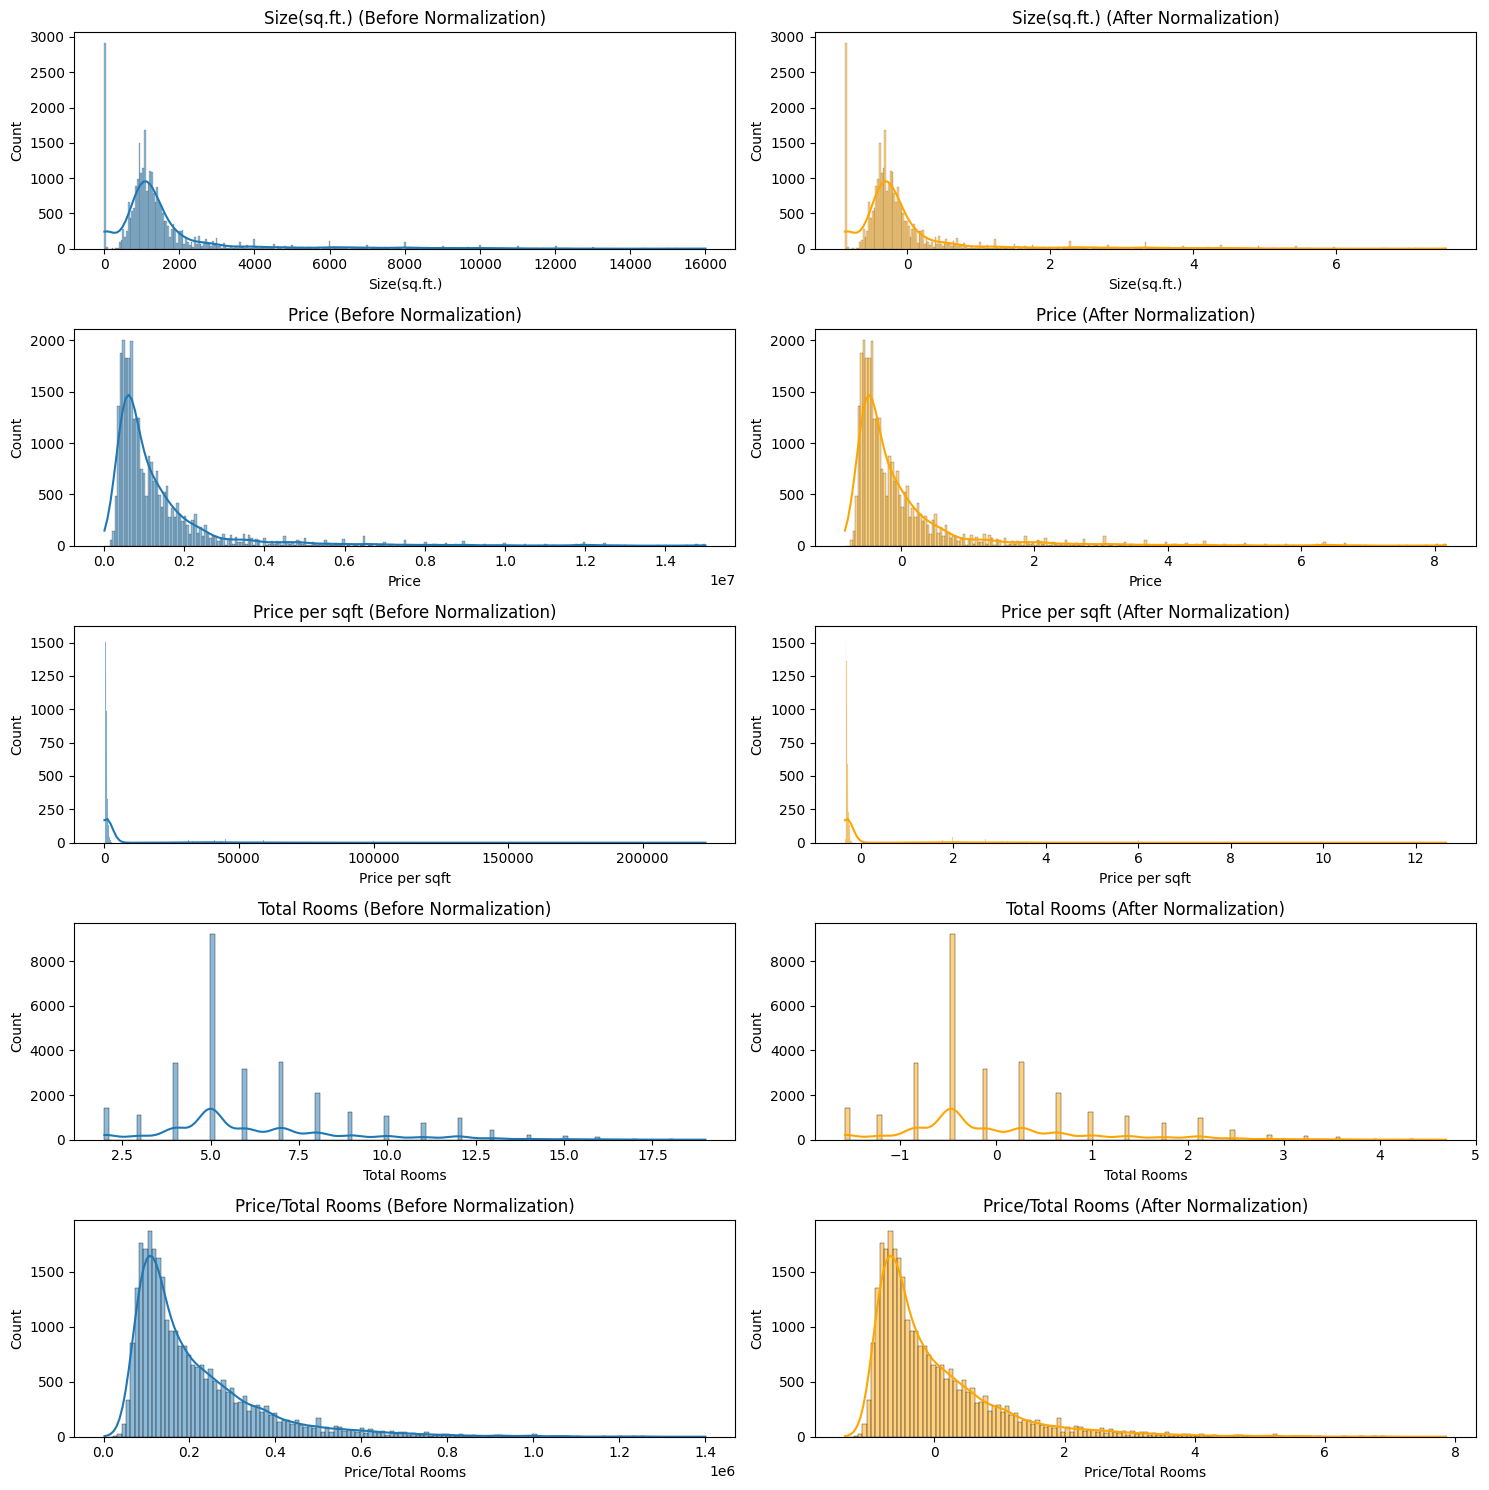

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'filtered_df2'
# (from the previous response where outliers were removed)

# Select numerical features for scaling/normalization
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Normalization (Standardization)
# Create a new DataFrame for normalized data to keep both versions
normalized_df = filtered_df2.copy()
normalizer = StandardScaler()
normalized_df[numerical_features] = normalizer.fit_transform(normalized_df[numerical_features])

# Plotting the distributions before and after normalization
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 15))  # Adjust figsize as needed

for i, feature in enumerate(numerical_features):
    # Before normalization
    sns.histplot(filtered_df2[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} (Before Normalization)')

    # After normalization
    sns.histplot(normalized_df[feature], ax=axes[i, 1], kde=True, color='orange')
    axes[i, 1].set_title(f'{feature} (After Normalization)')

plt.tight_layout()
plt.show()


*  MinMaxScaler




In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming your DataFrame is named 'filtered_df2'

# Select numerical features for scaling
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Imputation before scaling
imputer = SimpleImputer(strategy='median')  # Or other strategy like 'median'
scaled_df[numerical_features] = imputer.fit_transform(scaled_df[numerical_features])

# Min-Max Scaling (after imputation)
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Display the scaled DataFrame (optional)
print("Scaled DataFrame:")
print(scaled_df.head())

# Check for NaN values after scaling
print("\nNaN values after scaling:")
print(scaled_df.isna().sum())

Scaled DataFrame:
         Location     Price                   Property Type        Furnishing  \
0   Bukit Bintang  0.082661  Condominium/Serviced Residence   Fully Furnished   
2        Segambut  0.067983  Condominium/Serviced Residence  Partly Furnished   
18       Segambut  0.118020  Condominium/Serviced Residence  Partly Furnished   
20       Segambut  0.099340  Condominium/Serviced Residence  Partly Furnished   
22       Segambut  0.099340  Condominium/Serviced Residence   Fully Furnished   

   Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  
0       Built-Up      0.082750     0.235294        0.004161           0.147470  
2       Built-Up      0.116525     0.294118        0.002428           0.103694  
18      Built-Up      0.113710     0.411765        0.004324           0.139918  
20      Built-Up      0.111709     0.411765        0.003704           0.117661  
22      Built-Up      0.134538     0.352941        0.003074           0.132565  

NaN valu

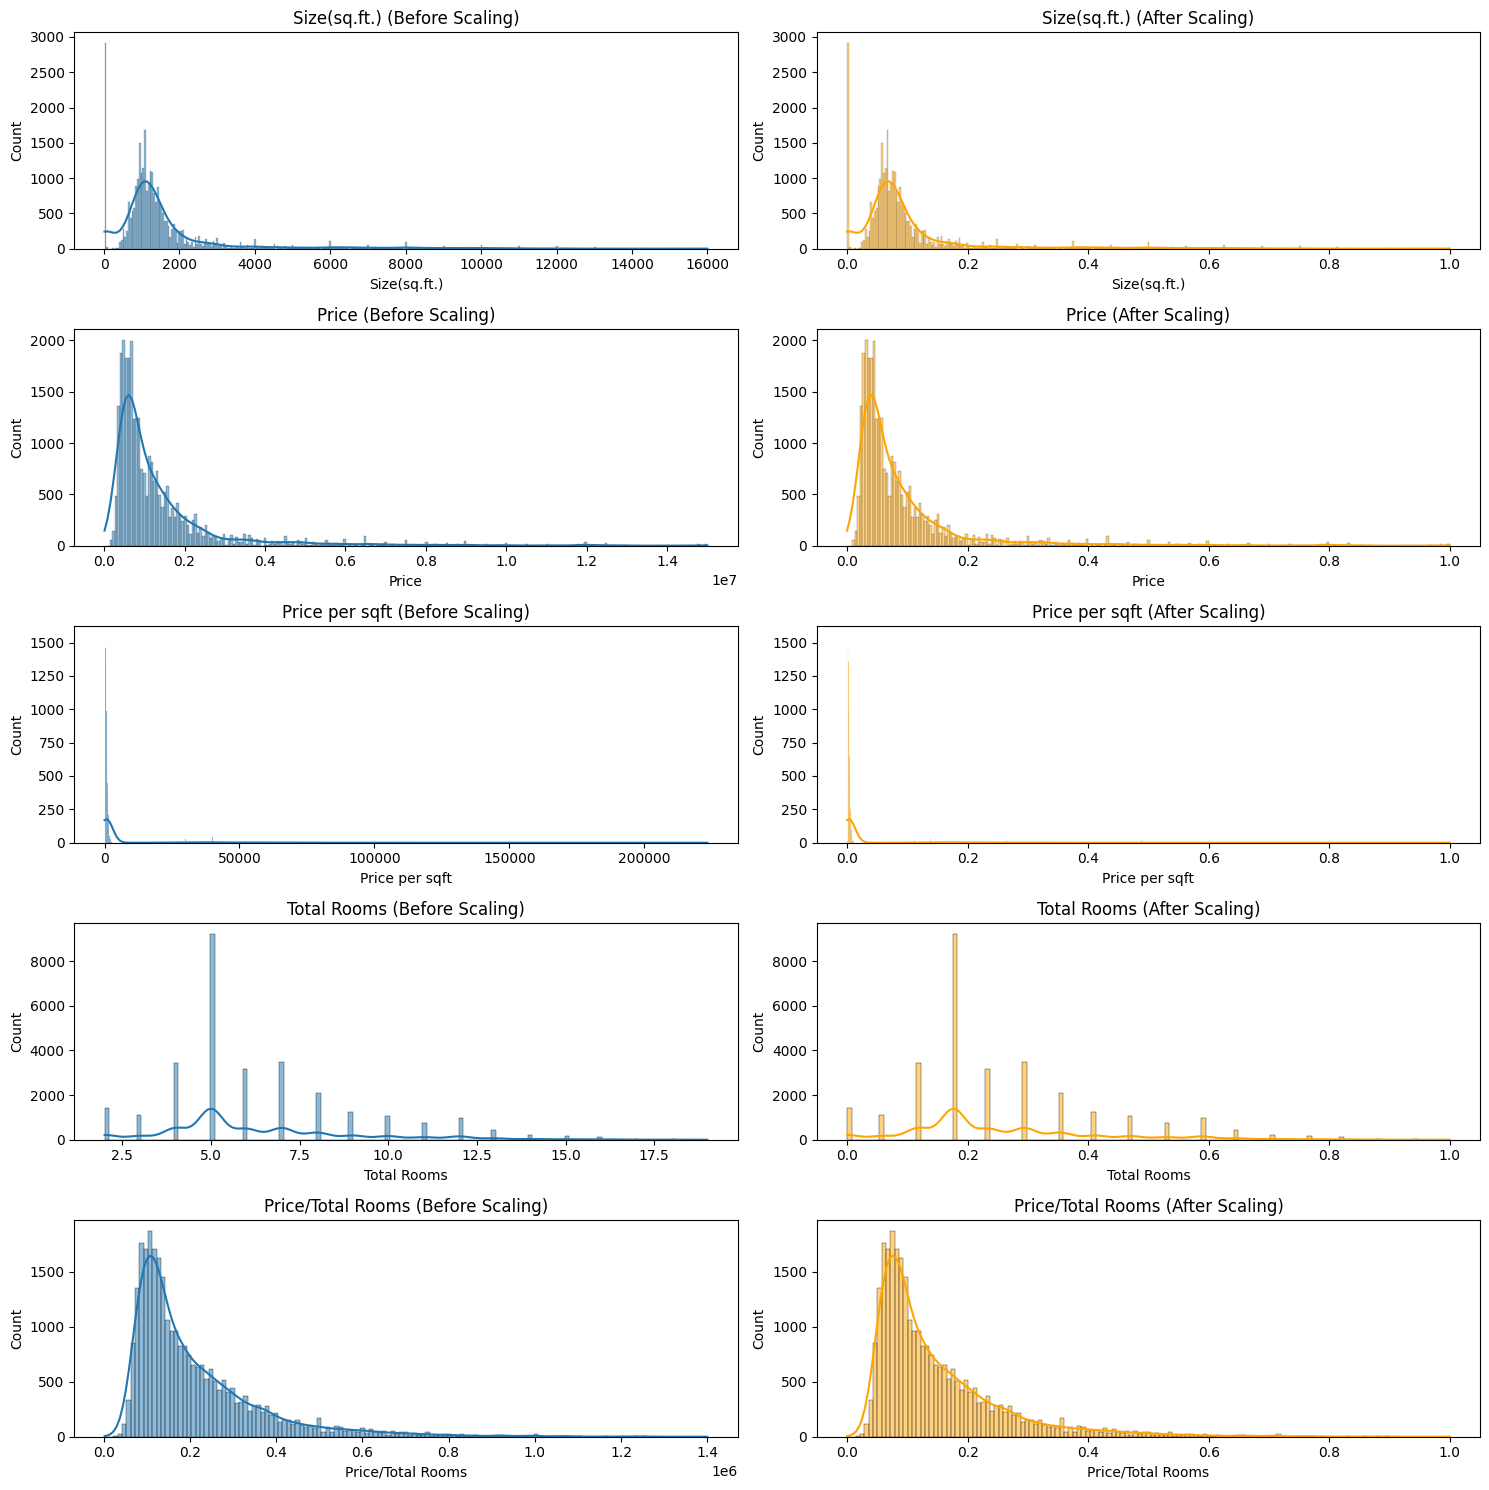

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'filtered_df2'

# Select numerical features for scaling
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Imputation before scaling
imputer = SimpleImputer(strategy='median')  # Or other strategy like 'mean'
scaled_df[numerical_features] = imputer.fit_transform(scaled_df[numerical_features])

# Min-Max Scaling (after imputation)
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Plotting the distributions before and after scaling
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 15))  # Adjust figsize as needed

for i, feature in enumerate(numerical_features):
    # Before scaling (using the original DataFrame with potential NaNs)
    sns.histplot(filtered_df2[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} (Before Scaling)')

    # After scaling (using the scaled DataFrame)
    sns.histplot(scaled_df[feature], ax=axes[i, 1], kde=True, color='orange')
    axes[i, 1].set_title(f'{feature} (After Scaling)')

plt.tight_layout()
plt.show()

In the end we select MinMaxScaler since it has the range of (0 to 1), allowing fair comparisons. The histograms above visualize how the distributions of these columns change after normalization

In [ ]:
scaled_df.dropna()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,0.082661,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.082750,0.235294,0.004161,0.147470
2,Segambut,0.067983,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.116525,0.294118,0.002428,0.103694
18,Segambut,0.118020,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.113710,0.411765,0.004324,0.139918
20,Segambut,0.099340,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.111709,0.411765,0.003704,0.117661
22,Segambut,0.099340,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.134538,0.352941,0.003074,0.132565
...,...,...,...,...,...,...,...,...,...
53708,Segambut,0.072653,1-1.5 Story,Partly Furnished,Land Area,0.001814,0.235294,0.120091,0.129585
53718,Titiwangsa,0.044633,1-1.5 Story,Partly Furnished,Built-Up,0.112710,0.235294,0.001647,0.079506
53764,Kepong,0.036960,1-1.5 Story,Partly Furnished,Land Area,0.000500,0.176471,0.126452,0.079267
53853,Batu,0.099340,1-1.5 Story,Partly Furnished,Land Area,0.001251,0.470588,0.209842,0.105738


In [ ]:
scaled_df.isna().sum()

,0
Location,0
Price,0
Property Type,0
Furnishing,0
Size Category,0
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0


#Final checking before exporting clean data.


In [ ]:
final_df = scaled_df.copy()  # Create a copy of df to avoid modifying the original

In [ ]:
final_df.isna().sum()

,0
Location,0
Price,0
Property Type,0
Furnishing,0
Size Category,0
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0


In [ ]:
final_df.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,0.082661,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.082750,0.235294,0.004161,0.147470
2,Segambut,0.067983,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.116525,0.294118,0.002428,0.103694
18,Segambut,0.118020,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.113710,0.411765,0.004324,0.139918
20,Segambut,0.099340,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.111709,0.411765,0.003704,0.117661
22,Segambut,0.099340,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.134538,0.352941,0.003074,0.132565


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29009 entries, 0 to 53873
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           29009 non-null  object 
 1   Price              29009 non-null  float64
 2   Property Type      29009 non-null  object 
 3   Furnishing         29009 non-null  object 
 4   Size Category      29009 non-null  object 
 5   Size(sq.ft.)       29009 non-null  float64
 6   Total Rooms        29009 non-null  float64
 7   Price per sqft     29009 non-null  float64
 8   Price/Total Rooms  29009 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.2+ MB


There are four categorical data location, property type, furnishing and size category.

All we make them into True and False, and then drop all these categorical data.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'scaled_df'

# Get a list of categorical features
categorical_features = ['Location', 'Property Type', 'Furnishing', 'Size Category']

# Perform one-hot encoding
encoded_df = pd.get_dummies(scaled_df, columns=categorical_features, drop_first=True, dtype=int)
# dtype=int ensures the encoded columns are integers (True/False represented as 1/0)
# drop_first=True avoids multicollinearity by dropping one level from each categorical feature

# Drop the original categorical columns
final_df = encoded_df.drop(categorical_features, axis=1, errors='ignore')
# errors='ignore' to handle cases where a column might have already been dropped

# Display the final DataFrame
print(final_df.head())

       Price  Size(sq.ft.)  Total Rooms  Price per sqft  Price/Total Rooms  \
0   0.082661      0.082750     0.235294        0.004161           0.147470   
2   0.067983      0.116525     0.294118        0.002428           0.103694   
18  0.118020      0.113710     0.411765        0.004324           0.139918   
20  0.099340      0.111709     0.411765        0.003704           0.117661   
22  0.099340      0.134538     0.352941        0.003074           0.132565   

    Location_Batu  Location_Bukit Bintang  Location_Cheras  Location_Kepong  \
0               0                       1                0                0   
2               0                       0                0                0   
18              0                       0                0                0   
20              0                       0                0                0   
22              0                       0                0                0   

    Location_Lembah Pantai  ...  Location_Wangsa Maju  \

In [ ]:
final_df.head()

,Price,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms,Location_Batu,Location_Bukit Bintang,Location_Cheras,Location_Kepong,Location_Lembah Pantai,...,Location_Wangsa Maju,Property Type_2-2.5 Story,Property Type_3+ Story,Property Type_Apartment/Flat,Property Type_Condominium/Serviced Residence,Property Type_Detached House,Property Type_Semi-detached House/Land,Furnishing_Partly Furnished,Furnishing_Unfurnished,Size Category_Land Area
0,0.082661,0.082750,0.235294,0.004161,0.147470,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.067983,0.116525,0.294118,0.002428,0.103694,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
18,0.118020,0.113710,0.411765,0.004324,0.139918,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
20,0.099340,0.111709,0.411765,0.003704,0.117661,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
22,0.099340,0.134538,0.352941,0.003074,0.132565,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_df.isna().sum()

,0
Price,0
Size(sq.ft.),0
Total Rooms,0
Price per sqft,0
Price/Total Rooms,0
Location_Batu,0
Location_Bukit Bintang,0
Location_Cheras,0
Location_Kepong,0
Location_Lembah Pantai,0


# Export Cleaned Data

In [ ]:
final_df.to_csv('cleaned_data_for_ml.csv', index=False)

# 4. Model Selection:
Once your data is ready, you will need to choose an appropriate machine
learning algorithm for your project. You may choose from supervised or unsupervised
learning, and select the model based on the problem you are trying to solve.

## Splitting Train and Test Data

We split to 80% train data and 20% test data.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the preprocessed and cleaned dataset
# The 'Price' column is not the first column, so no need to specify index_col
X = pd.read_csv('cleaned_data_for_ml.csv')

#Extract the target variable ('Price') and set it as variable 'y'
y = X.pop('Price')  # Now 'Price' is accessible as a regular column

#Split dataset into training and testing sets
#80% data used for training, 20% used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Determining Best Model

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Import all the necessary libraries for machine learning regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Assumes you have installed xgboost (pip install xgboost)
from sklearn.metrics import mean_squared_error, r2_score

# Create a list of regression models
regression_model_class = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    XGBRegressor,
]

# Model performance dictionary to store the results
model_performance = {
    'ModelName': ['LinearRegression',
                  'DecisionTreeRegressor',
                  'RandomForestRegressor',
                  'XGBRegressor'],
    'Model': [],
    'R-squared': [],  # Use R-squared for regression
    'RMSE': [],
}

# Loop through each regression model class
for ModelClass in regression_model_class:
    # Create model with specified arguments
    args = {'random_state': 161223} if ModelClass != LinearRegression else {}  # Handle XGBoost case
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction using the trained model
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['R-squared'].append(r2_score(y_test, y_pred))  # Calculate R-squared
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Create DataFrame from the model performance dictionary
model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)

               ModelName                                              Model  \
0       LinearRegression                                 LinearRegression()   
1  DecisionTreeRegressor         DecisionTreeRegressor(random_state=161223)   
2  RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
3           XGBRegressor  XGBRegressor(base_score=None, booster=None, ca...   

   R-squared      RMSE  
0   0.941926  0.027012  
1   0.998682  0.004069  
2   0.999696  0.001955  
3   0.998901  0.003716  


Text(0.5, 1.0, 'RMSE')

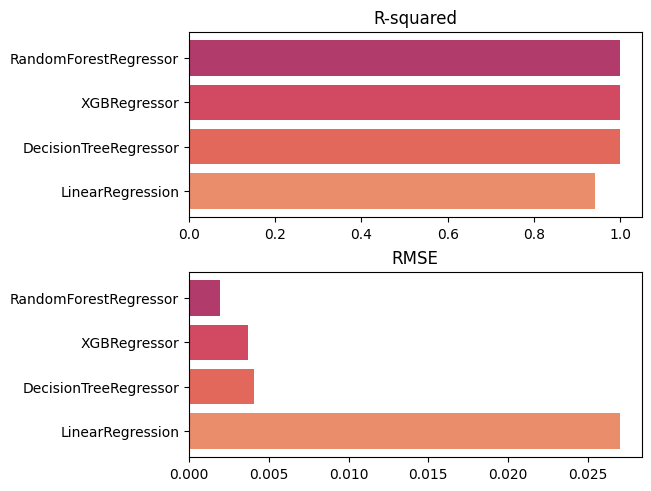

In [ ]:
# Visualize model performa nce by creating two subplots ax1 and ax2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

#Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)
#Horizontal bar chart is created on the first subplot (ax1). ( y-axis: 'ModelName', x-axis : 'R-squared')
ax1.barh(model_performance_df['ModelName'], model_performance_df['R-squared'], color=sns.color_palette('flare'))
#Set title of subplot ax1
ax1.set_title('R-squared')

#Arrange the models from highest to lowest RMSE for better visualization.
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
#Horizontal bar chart is created on the second subplot (ax2). ( y-axis: 'ModelName', x-axis : 'RMSE')
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
#Set title of subplot ax2
ax2.set_title('RMSE')

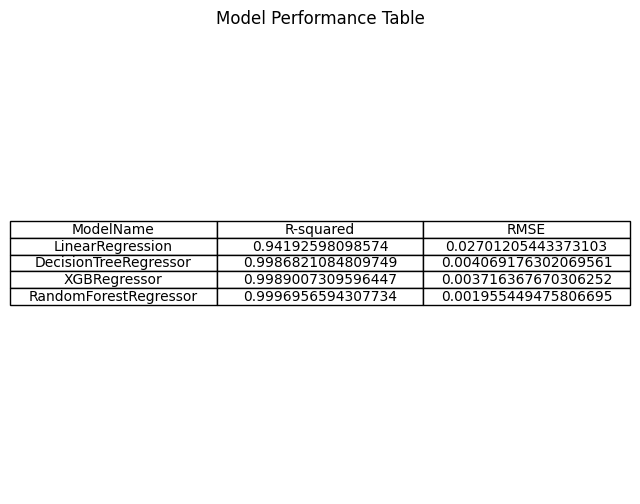

In [ ]:
import matplotlib.pyplot as plt

# Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(8, 6))

# Display the table in ascending order of R-squared
table_data = model_performance_df[['ModelName', 'R-squared', 'RMSE']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Remove axes for better visualization
ax.axis('off')

plt.title('Model Performance Table')
plt.show()

##Selected Model


####Eventually, we decided using DecisionTreeRegressor since its R-squared is close to 100% and the RMSE value is the very low,  Without further ado, We will choose DecisionTreeRegressor for our model.

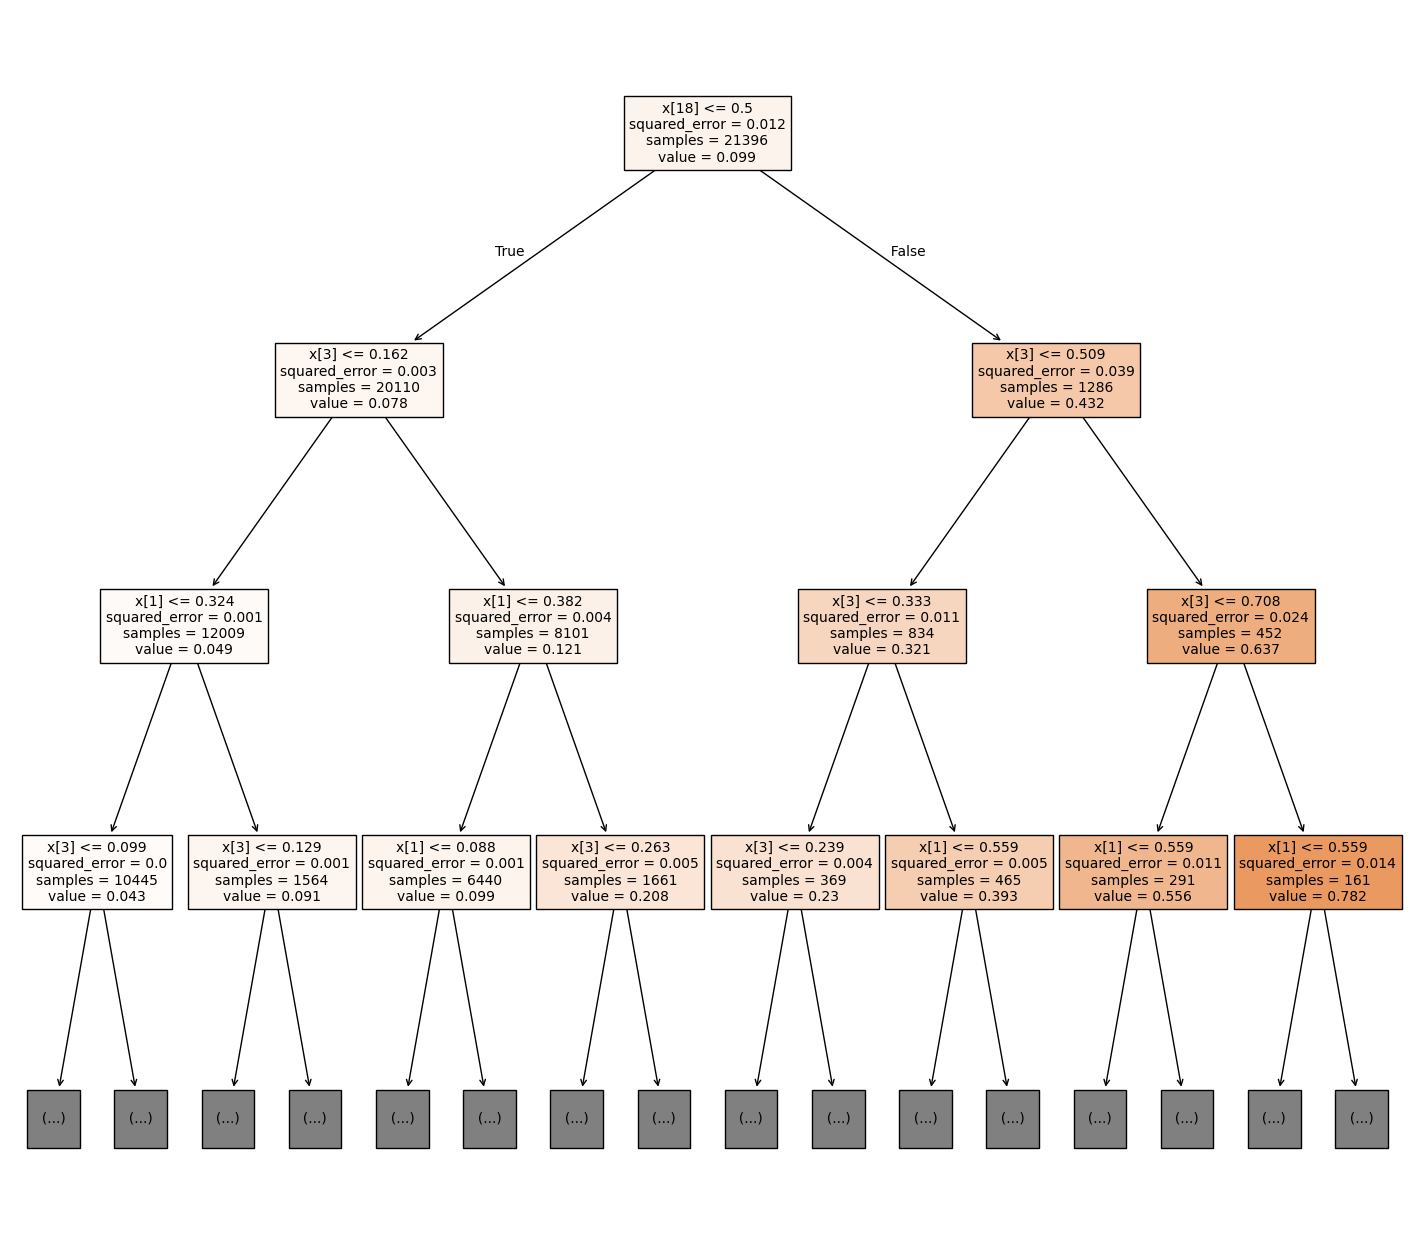

In [ ]:
import sklearn.ensemble  # Import the ensemble module
import matplotlib.pyplot as plt
import sklearn.tree # DecisionTreeRegressor is in sklearn.tree

# Use DecisionTreeRegressor for regression tasks
model = sklearn.tree.DecisionTreeRegressor(ccp_alpha=0.0, max_depth=9, min_samples_leaf=3, min_samples_split=5)

# Train the model
model.fit(X_train, y_train)

# Visualize the model
fig = plt.figure(figsize=(18,16))
sklearn.tree.plot_tree(model, filled=True, fontsize = 10, max_depth=3)  # Set max_depth to control the depth of visualization
plt.show()

# 5. Model Training and Evaluation
Once the model is selected, it needs to be trained on the preprocessed data, and its performance should be evaluated using appropriate metrics. The model can be fine-tuned to improve its performance through Hyperparameter Tuning.

## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
}

# Create an instance of GridSearchCV with DecisionTreeRegressor, searching over the specified parameter grid
# Using 4-fold cross-validation and R-squared as the scoring metric
clf = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=4) # Changed estimator to DecisionTreeRegressor

# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best R-squared score
clf.best_params_, clf.best_score_

({'max_depth': 9}, 0.9965233581362203)

The first hyperparameter values found were {'max_depth': 9} with a corresponding best R-squared score of approximately 0.9965233581362203.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [9],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': [i for i in range(1, 10)],
    'ccp_alpha': [i/10.0 for i in range(0, 10)]
}

# Use DecisionTreeRegressor for regression tasks
clf = GridSearchCV(DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=4)

# Fit the model
clf.fit(X_train, y_train)

# Display results
clf.best_params_, clf.best_score_

({'ccp_alpha': 0.0,
  'max_depth': 9,
  'min_samples_leaf': 2,
  'min_samples_split': 3},
 0.9967083190551995)

We can extend the GridSearch to include additional hyperparameters: 'max_depth','min_samples_split', 'min_samples_leaf', and 'ccp_alpha'.

The best hyperparameter values found in this case were {'ccp_alpha': 0.0, 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3} with a corresponding best accuracy score of approximately 0.9967083190551995.

In [ ]:
model.score(X_test, y_test)

0.9973537981536447

The best hyperparameters found during the tuning process are utilized for training the decision tree regressor model as shown above.

## Experimenting

Make a df copy and try a different normalisation technique to observe the change in accuracy

In [ ]:
df_normStandardScaler = final_df.copy()

In this case, we choose standard scaler as another method to normalise the data as our previous normalised data is using min max scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame for standardization
df_normstandard = scaled_df.copy()

# Perform standardization on selected 3 columns
df_normstandard[['Price', 'Price per sqft', 'Price/Total Rooms']] = scaler.fit_transform(df_normstandard[['Price', 'Price per sqft', 'Price/Total Rooms']])

# Display the first 5 rows of the standardized DataFrame
df_normstandard.head()

,Location,Price,Property Type,Furnishing,Size Category,Size(sq.ft.),Total Rooms,Price per sqft,Price/Total Rooms
0,Bukit Bintang,-0.090652,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.082750,0.235294,-0.291671,0.020366
2,Segambut,-0.232562,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.116525,0.294118,-0.313387,-0.416705
18,Segambut,0.251222,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.113710,0.411765,-0.289631,-0.055030
20,Segambut,0.070610,Condominium/Serviced Residence,Partly Furnished,Built-Up,0.111709,0.411765,-0.297398,-0.277250
22,Segambut,0.070610,Condominium/Serviced Residence,Fully Furnished,Built-Up,0.134538,0.352941,-0.305298,-0.128442


In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Use Regressor
import numpy as np

# ... (Your existing code for data preparation - up to df_encoded creation) ...

# One-Hot Encoding for categorical features
categorical_features = ['Location', 'Property Type', 'Furnishing', 'Size Category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' to avoid errors with unseen values during prediction
encoded_data = encoder.fit_transform(df[['Location', 'Property Type', 'Furnishing', 'Size Category']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with numerical features
numerical_features = ['Price', 'Size(sq.ft.)', 'Total Rooms', 'Price per sqft', 'Price/Total Rooms']
final_df = pd.concat([df[numerical_features], encoded_df], axis=1)


# Define features (X) and target (y)
X_exp = final_df.drop(columns=['Price'])  # Remove 'Price' from features
y_exp = final_df['Price']  # Target is 'Price'

# Handle NaN values in y_exp (if any)
y_exp = y_exp.fillna(y_exp.median())

# Split data into training and testing sets
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)  # random_state for reproducibility


# Create and train a DecisionTreeRegressor
model_exp = DecisionTreeRegressor(ccp_alpha=0.0, max_depth=9, min_samples_leaf=1, min_samples_split=3, random_state=42)  # random_state for reproducibility
model_exp.fit(X_train_exp, y_train_exp)

# ... (Rest of your code for model evaluation, etc.) ...

DecisionTreeRegressor(max_depth=9, min_samples_split=3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2)

In [ ]:
model_exp.score(X_test_exp, y_test_exp)

0.99839563486956

In [ ]:
# a table to compare the accuracy value of model.score and model_exp.score

model_score = model.score(X_test, y_test)
model_exp_score = model_exp.score(X_test_exp, y_test_exp)

table = pd.DataFrame({'Model': ['Decision Tree (Min Max Scaler)', 'Decision Tree (Standard Scaler)'],
                     'r2': [model_score, model_exp_score]})

table


,Model,r2
0,Decision Tree (Min Max Scaler),0.997354
1,Decision Tree (Standard Scaler),0.998396


## Pipelining

Since our data is preprocessed before entering into our ML model, we can create a pipeline. This allow us to generalize a dataset input from data preprocess to the ML model prediction and receive a output.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# Create Pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=161223, **clf.best_params_)),
])

In [ ]:
pipeline

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=9, min_samples_leaf=2,
                                       min_samples_split=3,
                                       random_state=161223))])

## Export Pipeline

Now we can export our pipeline for deployment using `joblib` library.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import joblib

# 1. Define your pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=161223, **clf.best_params_))
])

# 2. Fit the pipeline using your training data (X_train, y_train)
pipeline.fit(X_train, y_train)  # This is essential

# 3. Save the trained pipeline for deployment
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

## Load Pipeline

We can load our pipeline and predict it with our new test data to see if it works as expected.

- from the 20 percent earlier.

In [ ]:
# Load the pre-trained machine learning pipeline
pipeline_loaded = joblib.load('pipeline.pkl')

# Calculate the accuracy score of the model
pipeline_loaded.score(X_test, y_test)

0.9972115482376894

As what we expect, our pipeline is able to preprocess the data correctly and give us a fairly accurate result.



# 6. Final deliverable
Finally, you will need to present your findings and results in a clear and
concise manner. You must submit a Google drive link to your files . Please make grant access for me to view and assess your work. In the Google drive link, you must have:



(i) A report (word document) of max 8 pages with

(1) Introduction

(2) Background of the Problem

(3) Data Preprocessing (with Table 1 and Table 2)

(4) EDA (your questions here)

(5) Machine Learning models

(6) Results

(7) Conclusion.

(ii) A link to your Google Colab codes.

(iii) A poster presentation (Just one page).

It must contain:

(1) The problem

(2) The dataset

(3) The Insights (Asking Questions)

(4) The Machine Learning Models and Methods

(5) Results and Conclusion

##Evaluation


As a result, the accuracy of our trained model is 0.9972115482376894, which also means that it is approximately 99.72%. This displayed that our trained model has very high accuracy and performs extremely well.

#Reference

https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda